# Primary Contributary Causes of Road Accidents in Chicago

### Overview

In big and burgeoning urban centers, traffic safety is of paramount importance because of its significant impact on human lives and city resources. In a big city like Chicago, its crucial to analyse existing data on road accidents to establish patterns and address the leading contributary causes of road accidents.



By developing multiple models, various stakeholders like the Vehicle Safety Board would be able to determine the main contributary factors to road accidents and implement policies that will increase road safety.



### Problem Statement



This project aims to conduct a thorough analysis of traffic crashes in the city of Chicago, utilizing multiple modeling techniques. The primary goal is to uncover insights into the factors influencing traffic accidents in Chicago, and suggest proactive measures to reduce traffic accidents.





### Stake Holders



This project targets a diverse audience:



- **Vehicle Safety Board**: 



- **City planners and traffic engineers**:  



## Objectives:



1. **Identify the most significant contributing factors to road accidents in Chicago:**

   

2. **Provide insights into patterns and trends to help stakeholders implement targeted interventions to reduce road accidents:**

   

3. **Develop a Model based on metrics that address the predictors for road accidents the best:**

   

## Data Understanding

We've used three datasets from the City of Chicago:



1. **Crashes dataset:** Crashes dataset shows information about each traffic crash on city streets within the City of Chicago limits and under the jurisdiction of Chicago Police Department (CPD).



2. **People dataset:** This dataset contains information about people involved in a crash and if any injuries were sustained. Each record corresponds to an occupant in a vehicle listed in the Crash dataset.



3. **Vehicles dataset:** This dataset contains information about vehicles (or units as they are identified in crash reports) involved in a traffic crash. “Vehicle” information includes motor vehicle and non-motor vehicle modes of transportation, such as bicycles and pedestrians.






### Exploratory Data Analysis

#### Library Imports

In [571]:
#import files

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV, RandomizedSearchCV
from imblearn.over_sampling import SMOTE 
from scipy import stats as stats
from imblearn.pipeline import Pipeline as imbpipe
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,confusion_matrix,\
roc_curve,roc_auc_score,classification_report, auc, ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, LabelEncoder
from scipy.stats import randint
from xgboost import XGBClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from scipy import stats
from sklearn.impute import KNNImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

#### 1. Traffic crashes dataset 

##### Load the traffic crashes dataset from City of Chicago.

In [472]:
# Load the data into a dataframe and read the first five rows

crashes_df = pd.read_csv('/kaggle/input/crashes-dataset/Traffic_Crashes_-_Crashes_20241008.csv')

crashes_df.head()

,CRASH_RECORD_ID,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,23a79931ef555d54118f64dc9be2cf2dbf59636ce253f7...,NaN,09/05/2023 07:05:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DUSK,ANGLE,"FIVE POINT, OR MORE",...,2.0,0.0,2.0,0.0,19,3,9,NaN,NaN,NaN
1,2675c13fd0f474d730a5b780968b3cafc7c12d7adb661f...,NaN,09/22/2023 06:45:00 PM,50,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,DIVIDED - W/MEDIAN BARRIER,...,0.0,0.0,2.0,0.0,18,6,9,NaN,NaN,NaN
2,5f54a59fcb087b12ae5b1acff96a3caf4f2d37e79f8db4...,NaN,07/29/2023 02:45:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),...,0.0,0.0,1.0,0.0,14,7,7,41.85412,-87.665902,POINT (-87.665902342962 41.854120262952)
3,7ebf015016f83d09b321afd671a836d6b148330535d5df...,NaN,08/09/2023 11:00:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",SIDESWIPE SAME DIRECTION,NOT DIVIDED,...,0.0,0.0,2.0,0.0,23,4,8,NaN,NaN,NaN
4,6c1659069e9c6285a650e70d6f9b574ed5f64c12888479...,NaN,08/18/2023 12:50:00 PM,15,OTHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,OTHER,...,1.0,0.0,1.0,0.0,12,6,8,NaN,NaN,NaN


In [473]:
# Get the number of rows and columns in the dataset
crashes_df.shape

(880654, 48)

Dataset has 880654 rows and 48 columns

In [474]:
# Lists the columns in crashes dataset
crashes_df.columns

Index(['CRASH_RECORD_ID', 'CRASH_DATE_EST_I', 'CRASH_DATE',
       'POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION',
       'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE',
       'TRAFFICWAY_TYPE', 'LANE_CNT', 'ALIGNMENT', 'ROADWAY_SURFACE_COND',
       'ROAD_DEFECT', 'REPORT_TYPE', 'CRASH_TYPE', 'INTERSECTION_RELATED_I',
       'NOT_RIGHT_OF_WAY_I', 'HIT_AND_RUN_I', 'DAMAGE', 'DATE_POLICE_NOTIFIED',
       'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'STREET_NO',
       'STREET_DIRECTION', 'STREET_NAME', 'BEAT_OF_OCCURRENCE',
       'PHOTOS_TAKEN_I', 'STATEMENTS_TAKEN_I', 'DOORING_I', 'WORK_ZONE_I',
       'WORK_ZONE_TYPE', 'WORKERS_PRESENT_I', 'NUM_UNITS',
       'MOST_SEVERE_INJURY', 'INJURIES_TOTAL', 'INJURIES_FATAL',
       'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING',
       'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION',
       'INJURIES_UNKNOWN', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH',
       'LATITUDE', 

Check the data type held by each column and number of non-null values below

In [475]:
# Lists out column names data types and non-null count for the columns

crashes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 880654 entries, 0 to 880653
Data columns (total 48 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CRASH_RECORD_ID                880654 non-null  object 
 1   CRASH_DATE_EST_I               65255 non-null   object 
 2   CRASH_DATE                     880654 non-null  object 
 3   POSTED_SPEED_LIMIT             880654 non-null  int64  
 4   TRAFFIC_CONTROL_DEVICE         880654 non-null  object 
 5   DEVICE_CONDITION               880654 non-null  object 
 6   WEATHER_CONDITION              880654 non-null  object 
 7   LIGHTING_CONDITION             880654 non-null  object 
 8   FIRST_CRASH_TYPE               880654 non-null  object 
 9   TRAFFICWAY_TYPE                880654 non-null  object 
 10  LANE_CNT                       199017 non-null  float64
 11  ALIGNMENT                      880654 non-null  object 
 12  ROADWAY_SURFACE_COND          

Check percentage of null values in each column of the dataset.

In [476]:
# Function that calculates the percentage of null values in every column and displays the series.

def null_percentages(df):
    
    # Calculate the number of missing values and their percentage
    missing_values = df.isnull().sum()
    missing_percentage = (missing_values / df.shape[0]) * 100
    
    # Create a DataFrame with the results
    missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})

    # Filter out columns with no missing values and sort by 'Missing Values'
    missing_data = missing_data[missing_data['Missing Values'] > 0].sort_values(by='Missing Values', ascending=False)

    return missing_data


In [477]:
# Check null values in the crashes dataset

null_percentages(crashes_df)

,Missing Values,Percentage
WORKERS_PRESENT_I,879377,99.854994
DOORING_I,877867,99.683531
WORK_ZONE_TYPE,876817,99.564301
WORK_ZONE_I,875687,99.435987
PHOTOS_TAKEN_I,868705,98.643167
STATEMENTS_TAKEN_I,860492,97.710565
NOT_RIGHT_OF_WAY_I,840417,95.431009
CRASH_DATE_EST_I,815399,92.590166
LANE_CNT,681637,77.401227
INTERSECTION_RELATED_I,678655,77.062615


##### Data cleaning

First, we'll drop columns with more than 75% of the data missing

In [478]:
# Function that drops columns from a DataFrame that have a null value percentage higher than the specified value in optional parameter (threshold).

def drop_highnull_columns(df, threshold=75):
   # Calculate the percentage of null values in each column

   null_percentages = (df.isnull().sum() / len(df)) * 100

   # Identify columns to drop

   columns_to_drop = null_percentages[null_percentages > threshold].index

   # Drop the identified columns
   df = df.drop(columns=columns_to_drop, axis=1)
    
   return df

In [479]:
# Implement drop_highnull_columns function on the crashes_df dataset

crashes_df_droppedna = drop_highnull_columns(crashes_df)

crashes_df_droppedna.shape

(880654, 38)

The new dataset(crashes_df_dropped) now has 38 columns from the original 48.

In [480]:
# Check the remaining null values in the dataset

null_percentages(crashes_df_droppedna)

,Missing Values,Percentage
HIT_AND_RUN_I,604490,68.641033
REPORT_TYPE,27052,3.071808
LOCATION,6275,0.712539
LONGITUDE,6275,0.712539
LATITUDE,6275,0.712539
MOST_SEVERE_INJURY,1958,0.222335
INJURIES_FATAL,1944,0.220745
INJURIES_TOTAL,1944,0.220745
INJURIES_NO_INDICATION,1944,0.220745
INJURIES_REPORTED_NOT_EVIDENT,1944,0.220745


__Next, Select features/columns that are important and non-repetitive__

In [481]:
# Select the most important features.

crashes_df_dropped = crashes_df_droppedna[['CRASH_RECORD_ID', 'WEATHER_CONDITION', 'LIGHTING_CONDITION', 
                                          'ROADWAY_SURFACE_COND', 'ROAD_DEFECT','CRASH_TYPE', 'DAMAGE',
                                           'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'CRASH_HOUR',
                                           'CRASH_DAY_OF_WEEK', 'CRASH_MONTH', 'LATITUDE', 'LONGITUDE', 'TRAFFICWAY_TYPE', 'ALIGNMENT']]

crashes_df_dropped.shape

(880654, 16)

##### Selected features:



* `CRASH_RECORD_ID` This number can be used to link to the same crash in the Vehicles and People datasets. This number also serves as a unique ID in this dataset.

* `ALIGNMENT` Street alignment at crash location, as determined by reporting officer e.g 'STRAIGHT AND LEVEL', 'CURVE ON GRADE', 'CURVE, LEVEL', 'STRAIGHT ON GRADE', 'STRAIGHT ON HILLCREST', 'CURVE ON HILLCREST'

* `WEATHER_CONDITION` Weather condition at time of crash, as determined by reporting officer

* `LIGHTING_CONDITION` Light condition at time of crash, as determined by reporting officer

* `TRAFFICWAY_TYPE` Trafficway type, as determined by reporting officer e.g INTERSECTION', 'RAMP','FOUR WAY', 'DIVIDED - W/MEDIAN (NOT RAISED)', 'UNKNOWN' etc

* `ROADWAY_SURFACE_COND` Road surface condition, as determined by reporting officer

* `ROAD_DEFECT` Road defects, as determined by reporting officer

* `CRASH_TYPE` A general severity classification for the crash. Can be either Injury and/or Tow Due to Crash or No Injury / Drive Away

* `DAMAGE` - A field observation of estimated value damage.

* `PRIM_CONTRIBUTORY_CAUSE` The factor which was most significant in causing the crash, as determined by officer judgment

* `SEC_CONTRIBUTORY_CAUSE` The factor which was second most significant in causing the crash, as determined by officer judgment

* `CRASH_HOUR` The hour of the day component of CRASH_DATE.

* `CRASH_DAY_OF_WEEK` The day of the week component of CRASH_DATE. Sunday=1

* `CRASH_MONTH` The month of the year component of CRASH_DATE.

* `LONGITUDE` and `LATITUDE` - The crash location, as determined by reporting officer, 

#### 2. Vehicles dataset 

##### Load the traffic crashes dataset from City of Chicago.

In [482]:
vehicles_df = pd. read_csv('/kaggle/input/crashes-dataset/Traffic_Crashes_-_Vehicles_20241008.csv', low_memory=False)

vehicles_df.head()

,CRASH_UNIT_ID,CRASH_RECORD_ID,CRASH_DATE,UNIT_NO,UNIT_TYPE,NUM_PASSENGERS,VEHICLE_ID,CMRC_VEH_I,MAKE,MODEL,...,TRAILER1_LENGTH,TRAILER2_LENGTH,TOTAL_VEHICLE_LENGTH,AXLE_CNT,VEHICLE_CONFIG,CARGO_BODY_TYPE,LOAD_TYPE,HAZMAT_OUT_OF_SERVICE_I,MCS_OUT_OF_SERVICE_I,HAZMAT_CLASS
0,1717556,7b1763088507f77e0e552c009a6bf89a4d6330c7527706...,12/06/2023 03:24:00 PM,1,DRIVER,NaN,1634931.0,NaN,NISSAN,SENTRA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1717574,2603ff5a88f0b9b54576934c5ed4e4a64e8278e005687b...,12/06/2023 04:00:00 PM,2,DRIVER,NaN,1634978.0,NaN,CHRYSLER,SEBRING,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1717579,a52ef70e33d468b855b5be44e8638a564434dcf99c0edf...,12/06/2023 04:30:00 PM,1,DRIVER,NaN,1634948.0,NaN,SUBARU,OUTBACK,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1720118,609055f4b1a72a44d6ec40ba9036cefd7c1287a755eb6c...,12/10/2023 12:12:00 PM,1,DRIVER,NaN,1637401.0,NaN,TOYOTA,RAV4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1720119,609055f4b1a72a44d6ec40ba9036cefd7c1287a755eb6c...,12/10/2023 12:12:00 PM,2,DRIVER,NaN,1637408.0,NaN,SUBARU,OUTBACK,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [483]:
# Get the number of rows and columns in the dataset

vehicles_df.shape

(1796451, 71)

Dataset has 1796451 rows and 71 columns

In [484]:
# Lists the columns in vehicles dataset

vehicles_df.columns

Index(['CRASH_UNIT_ID', 'CRASH_RECORD_ID', 'CRASH_DATE', 'UNIT_NO',
       'UNIT_TYPE', 'NUM_PASSENGERS', 'VEHICLE_ID', 'CMRC_VEH_I', 'MAKE',
       'MODEL', 'LIC_PLATE_STATE', 'VEHICLE_YEAR', 'VEHICLE_DEFECT',
       'VEHICLE_TYPE', 'VEHICLE_USE', 'TRAVEL_DIRECTION', 'MANEUVER',
       'TOWED_I', 'FIRE_I', 'OCCUPANT_CNT', 'EXCEED_SPEED_LIMIT_I', 'TOWED_BY',
       'TOWED_TO', 'AREA_00_I', 'AREA_01_I', 'AREA_02_I', 'AREA_03_I',
       'AREA_04_I', 'AREA_05_I', 'AREA_06_I', 'AREA_07_I', 'AREA_08_I',
       'AREA_09_I', 'AREA_10_I', 'AREA_11_I', 'AREA_12_I', 'AREA_99_I',
       'FIRST_CONTACT_POINT', 'CMV_ID', 'USDOT_NO', 'CCMC_NO', 'ILCC_NO',
       'COMMERCIAL_SRC', 'GVWR', 'CARRIER_NAME', 'CARRIER_STATE',
       'CARRIER_CITY', 'HAZMAT_PLACARDS_I', 'HAZMAT_NAME', 'UN_NO',
       'HAZMAT_PRESENT_I', 'HAZMAT_REPORT_I', 'HAZMAT_REPORT_NO',
       'MCS_REPORT_I', 'MCS_REPORT_NO', 'HAZMAT_VIO_CAUSE_CRASH_I',
       'MCS_VIO_CAUSE_CRASH_I', 'IDOT_PERMIT_NO', 'WIDE_LOAD_I',
       'TRAILER1_

In [485]:
# Lists out column names data types and non-null count for the columns

vehicles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1796451 entries, 0 to 1796450
Data columns (total 71 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   CRASH_UNIT_ID             int64  
 1   CRASH_RECORD_ID           object 
 2   CRASH_DATE                object 
 3   UNIT_NO                   int64  
 4   UNIT_TYPE                 object 
 5   NUM_PASSENGERS            float64
 6   VEHICLE_ID                float64
 7   CMRC_VEH_I                object 
 8   MAKE                      object 
 9   MODEL                     object 
 10  LIC_PLATE_STATE           object 
 11  VEHICLE_YEAR              float64
 12  VEHICLE_DEFECT            object 
 13  VEHICLE_TYPE              object 
 14  VEHICLE_USE               object 
 15  TRAVEL_DIRECTION          object 
 16  MANEUVER                  object 
 17  TOWED_I                   object 
 18  FIRE_I                    object 
 19  OCCUPANT_CNT              float64
 20  EXCEED_SPEED_LIMIT_I    

Check percentage of null values in each column of the dataset.

In [486]:
# # Check null values in the vehicles dataset

null_percentages(vehicles_df)

,Missing Values,Percentage
HAZMAT_REPORT_NO,1796450,99.999944
MCS_REPORT_NO,1796444,99.999610
HAZMAT_NAME,1796388,99.996493
TRAILER2_LENGTH,1796381,99.996103
WIDE_LOAD_I,1796290,99.991038
...,...,...
VEHICLE_USE,41864,2.330372
MANEUVER,41864,2.330372
TRAVEL_DIRECTION,41864,2.330372
OCCUPANT_CNT,41864,2.330372


##### Data cleaning

First, we'll drop columns with more than 75% of the data missing

In [487]:
# Implement drop_highnull_columns function on the vehicles dataset

vehicles_df_droppedna = drop_highnull_columns(vehicles_df)

vehicles_df_droppedna.shape

(1796451, 18)

The new dataset(vehicles_df_droppedna) now has 18 columns from the original 71 columns.

In [488]:
# Check the remaining null values in the dataset
null_percentages(vehicles_df_droppedna)

,Missing Values,Percentage
AREA_01_I,1314830,73.190418
VEHICLE_YEAR,321383,17.889884
LIC_PLATE_STATE,202511,11.272837
FIRST_CONTACT_POINT,45007,2.505329
MODEL,42014,2.338722
MAKE,41869,2.330651
TRAVEL_DIRECTION,41864,2.330372
VEHICLE_ID,41864,2.330372
VEHICLE_DEFECT,41864,2.330372
VEHICLE_TYPE,41864,2.330372


__Next, Select features/columns that are important and non-repetitive__

In [489]:
# Select the most important features.

vehicles_df_dropped = vehicles_df_droppedna[['CRASH_RECORD_ID', 'UNIT_TYPE', 'MANEUVER',
                                          'VEHICLE_DEFECT', 'VEHICLE_USE','VEHICLE_TYPE']]

vehicles_df_dropped.shape

(1796451, 6)

##### Selected features:



* `CRASH_RECORD_ID` This number can be used to link to the same crash in the Crashes and People datasets. 

* `UNIT_TYPE` Describes the state/type of units involved in the crash(NON-MOTOR VEHICLE, BICYCLE, DRIVERLESS, DRIVER, PARKED)

* `VEHICLE_TYPE` The type of vehicle(Passenger, SUV, Pick-up, Bus)

* `VEHICLE_USE` The normal use of the vehicle(Personal, taxi, Police, School bus etc)

* `VEHICLE_DEFECT` Defects on the car as observed by reporting officer

* `MANEUVER` The action the unit was taking prior to the crash, as determined by the reporting officer

#### 3. People Dataset 

##### Load the People dataset from City of Chicago.

In [490]:
# Load the data into a dataframe and read the first five rows

people_df = pd. read_csv('/kaggle/input/crashes-dataset/Traffic_Crashes_-_People_20241008.csv', low_memory=False)
people_df.head()

,PERSON_ID,PERSON_TYPE,CRASH_RECORD_ID,VEHICLE_ID,CRASH_DATE,SEAT_NO,CITY,STATE,ZIPCODE,SEX,...,EMS_RUN_NO,DRIVER_ACTION,DRIVER_VISION,PHYSICAL_CONDITION,PEDPEDAL_ACTION,PEDPEDAL_VISIBILITY,PEDPEDAL_LOCATION,BAC_RESULT,BAC_RESULT VALUE,CELL_PHONE_USE
0,O749947,DRIVER,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,834816.0,09/28/2019 03:30:00 AM,NaN,CHICAGO,IL,60651,M,...,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
1,O871921,DRIVER,af84fb5c8d996fcd3aefd36593c3a02e6e7509eeb27568...,827212.0,04/13/2020 10:50:00 PM,NaN,CHICAGO,IL,60620,M,...,NaN,NONE,NOT OBSCURED,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
2,O10018,DRIVER,71162af7bf22799b776547132ebf134b5b438dcf3dac6b...,9579.0,11/01/2015 05:00:00 AM,NaN,NaN,NaN,NaN,X,...,NaN,IMPROPER BACKING,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
3,O10038,DRIVER,c21c476e2ccc41af550b5d858d22aaac4ffc88745a1700...,9598.0,11/01/2015 08:00:00 AM,NaN,NaN,NaN,NaN,X,...,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
4,O10039,DRIVER,eb390a4c8e114c69488f5fb8a097fe629f5a92fd528cf4...,9600.0,11/01/2015 10:15:00 AM,NaN,NaN,NaN,NaN,X,...,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN


In [491]:
people_df.shape

(1934071, 29)

Dataset has 1934071 rows and 29 columns

In [492]:
# Lists the columns in crashes dataset

people_df.columns

Index(['PERSON_ID', 'PERSON_TYPE', 'CRASH_RECORD_ID', 'VEHICLE_ID',
       'CRASH_DATE', 'SEAT_NO', 'CITY', 'STATE', 'ZIPCODE', 'SEX', 'AGE',
       'DRIVERS_LICENSE_STATE', 'DRIVERS_LICENSE_CLASS', 'SAFETY_EQUIPMENT',
       'AIRBAG_DEPLOYED', 'EJECTION', 'INJURY_CLASSIFICATION', 'HOSPITAL',
       'EMS_AGENCY', 'EMS_RUN_NO', 'DRIVER_ACTION', 'DRIVER_VISION',
       'PHYSICAL_CONDITION', 'PEDPEDAL_ACTION', 'PEDPEDAL_VISIBILITY',
       'PEDPEDAL_LOCATION', 'BAC_RESULT', 'BAC_RESULT VALUE',
       'CELL_PHONE_USE'],
      dtype='object')

Check the data type held by each column and number of non-null values below

In [493]:
# Lists out column names data types and non-null count for the columns

people_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1934071 entries, 0 to 1934070
Data columns (total 29 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   PERSON_ID              object 
 1   PERSON_TYPE            object 
 2   CRASH_RECORD_ID        object 
 3   VEHICLE_ID             float64
 4   CRASH_DATE             object 
 5   SEAT_NO                float64
 6   CITY                   object 
 7   STATE                  object 
 8   ZIPCODE                object 
 9   SEX                    object 
 10  AGE                    float64
 11  DRIVERS_LICENSE_STATE  object 
 12  DRIVERS_LICENSE_CLASS  object 
 13  SAFETY_EQUIPMENT       object 
 14  AIRBAG_DEPLOYED        object 
 15  EJECTION               object 
 16  INJURY_CLASSIFICATION  object 
 17  HOSPITAL               object 
 18  EMS_AGENCY             object 
 19  EMS_RUN_NO             object 
 20  DRIVER_ACTION          object 
 21  DRIVER_VISION          object 
 22  PHYSICAL_CONDITION

Check percentage of null values in each column of the dataset.

In [494]:
# Check null values in the people dataset

null_percentages(people_df)

,Missing Values,Percentage
CELL_PHONE_USE,1932911,99.940023
BAC_RESULT VALUE,1931954,99.890542
EMS_RUN_NO,1901577,98.319917
PEDPEDAL_VISIBILITY,1896437,98.054156
PEDPEDAL_ACTION,1896369,98.050640
PEDPEDAL_LOCATION,1896369,98.050640
EMS_AGENCY,1739411,89.935220
HOSPITAL,1618955,83.707113
SEAT_NO,1542674,79.763049
DRIVERS_LICENSE_CLASS,991828,51.281882


##### Data cleaning

First, we'll drop columns with more than 75% of the data missing

In [495]:
# Implement drop_highnull_columns function on the crashes_df dataset

people_df_droppedna = drop_highnull_columns(people_df)

people_df_droppedna.shape

(1934071, 20)

The new dataset(crashes_df_dropped) now has 20 columns from the original 29.

In [496]:
# Check the remaining null values in the dataset

null_percentages(people_df_droppedna)

,Missing Values,Percentage
DRIVERS_LICENSE_CLASS,991828,51.281882
DRIVERS_LICENSE_STATE,802141,41.474227
ZIPCODE,640286,33.105610
AGE,563790,29.150429
CITY,526939,27.245070
STATE,505564,26.139888
DRIVER_VISION,395457,20.446871
DRIVER_ACTION,394865,20.416262
BAC_RESULT,393922,20.367505
PHYSICAL_CONDITION,393809,20.361662


__Next, Select features/columns that are important and non-repetitive__

In [497]:
# Select the most important features.

people_df_dropped = people_df_droppedna[['CRASH_RECORD_ID', 'PERSON_TYPE', 'SEX',
                                         'AGE', 'INJURY_CLASSIFICATION', 'DRIVER_ACTION', 'PERSON_ID', 
                                         'DRIVER_VISION', 'PHYSICAL_CONDITION', 'SAFETY_EQUIPMENT']]

people_df_dropped.shape

(1934071, 10)

##### Selected features:

* `SAFETY_EQUIPMENT` This shows whether safety measures were used or not

* `CRASH_RECORD_ID` This number can be used to link to the same crash in the Vehicles and People datasets. 

* `PERSON_ID` This number serves as a unique ID in this dataset.

* `PERSON_TYPE` Type of roadway user involved in crash (Driver, passenger, pedestrian, bicycle)

* `SEX` Gender of person involved in crash, as determined by reporting officer

* `INJURY_CLASSIFICATION` Severity of injury person sustained in the crash

* `DRIVER_ACTION` Driver action that contributed to the crash, as determined by reporting officer

* `AGE` Age of person involved in crash

* `PHYSICAL CONDITION` This refers to the wellness and fitness of a person at the time of the crash

Merging all the data into one dataframe
----------
Since we are focusing on predicting the causes that result to crashes, we will merge on people_df_dropped in the left join with crashes_df_dropped and vehicles_df_dropped also on the left.

In [498]:
# First merge crashes and vehicles dataset together using 'CRASH_RECORD_ID' column

merged_crashes_vehicles = pd.merge(
    crashes_df_dropped,
    vehicles_df_dropped,
    on='CRASH_RECORD_ID',
    how='left',
    suffixes=('_crash', '_vehicles'))  # Add suffix to differentiate columns

In [499]:
# Finally merge the people dataset

final_merged_df = pd.merge(
    merged_crashes_vehicles,
    people_df_dropped,
    on='CRASH_RECORD_ID',
    how='left',
    suffixes=('_merged', '_people'))  # Add suffix for People dataset


In [500]:
final_merged_df.shape

(4065653, 30)

In [501]:
final_merged_df.columns

Index(['CRASH_RECORD_ID', 'WEATHER_CONDITION', 'LIGHTING_CONDITION',
       'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'CRASH_TYPE', 'DAMAGE',
       'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'CRASH_HOUR',
       'CRASH_DAY_OF_WEEK', 'CRASH_MONTH', 'LATITUDE', 'LONGITUDE',
       'TRAFFICWAY_TYPE', 'ALIGNMENT', 'UNIT_TYPE', 'MANEUVER',
       'VEHICLE_DEFECT', 'VEHICLE_USE', 'VEHICLE_TYPE', 'PERSON_TYPE', 'SEX',
       'AGE', 'INJURY_CLASSIFICATION', 'DRIVER_ACTION', 'PERSON_ID',
       'DRIVER_VISION', 'PHYSICAL_CONDITION', 'SAFETY_EQUIPMENT'],
      dtype='object')

In [502]:
# Gets the number of rows and columns in the dataset

final_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4065653 entries, 0 to 4065652
Data columns (total 30 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   CRASH_RECORD_ID          object 
 1   WEATHER_CONDITION        object 
 2   LIGHTING_CONDITION       object 
 3   ROADWAY_SURFACE_COND     object 
 4   ROAD_DEFECT              object 
 5   CRASH_TYPE               object 
 6   DAMAGE                   object 
 7   PRIM_CONTRIBUTORY_CAUSE  object 
 8   SEC_CONTRIBUTORY_CAUSE   object 
 9   CRASH_HOUR               int64  
 10  CRASH_DAY_OF_WEEK        int64  
 11  CRASH_MONTH              int64  
 12  LATITUDE                 float64
 13  LONGITUDE                float64
 14  TRAFFICWAY_TYPE          object 
 15  ALIGNMENT                object 
 16  UNIT_TYPE                object 
 17  MANEUVER                 object 
 18  VEHICLE_DEFECT           object 
 19  VEHICLE_USE              object 
 20  VEHICLE_TYPE             object 
 21  PERSON_T

Dataset has 4065653 rows and 30 columns

#### Remove row duplicates

__For crash specific details about a traffic crash, I'll use a deduplicated dataframe of the merged dataset. Each row will have information about a unique crash__

In [503]:
# Function that selects unique crashes and person type to driver. 
def select_unique_crashes(df):
    driver_df = df[df['PERSON_TYPE'] == 'DRIVER']
    return driver_df.drop_duplicates(subset = 'CRASH_RECORD_ID')

In [504]:
final_merged_df = select_unique_crashes(final_merged_df)
final_merged_df.shape

(877264, 30)

In [505]:
final_merged_df.duplicated().sum()

0

#### Remove null values

In [506]:
# check null values in the merged dataset
null_percentages(final_merged_df)

,Missing Values,Percentage
AGE,348648,39.742654
VEHICLE_TYPE,9001,1.026031
VEHICLE_DEFECT,9001,1.026031
VEHICLE_USE,9001,1.026031
MANEUVER,9001,1.026031
LATITUDE,6257,0.713240
LONGITUDE,6257,0.713240
UNIT_TYPE,1528,0.174178
SEX,90,0.010259


#### Merged Dataset Cleaning

Remove null values in `AGE` column by replacing null values with an unknown category represented with the value -1

In [507]:
# Change negative and 0 age values to null in the AGE column

final_merged_df.loc[final_merged_df['AGE'] <= 0, 'AGE'] = np.nan

In [508]:
final_merged_df['AGE'].fillna(-1, inplace=True)

In [509]:
# Drop rows with null values in the columns below that are less than one percent of the dataset

final_merged_df.dropna(subset=['SEX','PERSON_TYPE', 'VEHICLE_TYPE', 'VEHICLE_USE', 'VEHICLE_DEFECT', 'LONGITUDE', 'LATITUDE', 'UNIT_TYPE'], inplace=True)

In [510]:
final_merged_df['INJURY_CLASSIFICATION'].value_counts()

INJURY_CLASSIFICATION
NO INDICATION OF INJURY     824508
NONINCAPACITATING INJURY     22248
REPORTED, NOT EVIDENT        10336
INCAPACITATING INJURY         4433
FATAL                          421
Name: count, dtype: int64

In [511]:
final_merged_df['INJURY_CLASSIFICATION'].fillna('UNKNOWN', inplace=True)

In [512]:
null_percentages(final_merged_df)

,Missing Values,Percentage


In [513]:
final_merged_df.shape

(861946, 30)

## DATA ANALYSIS

#### Analysis 1: Identify the most significant contributing factors to road accidents in Chicago:

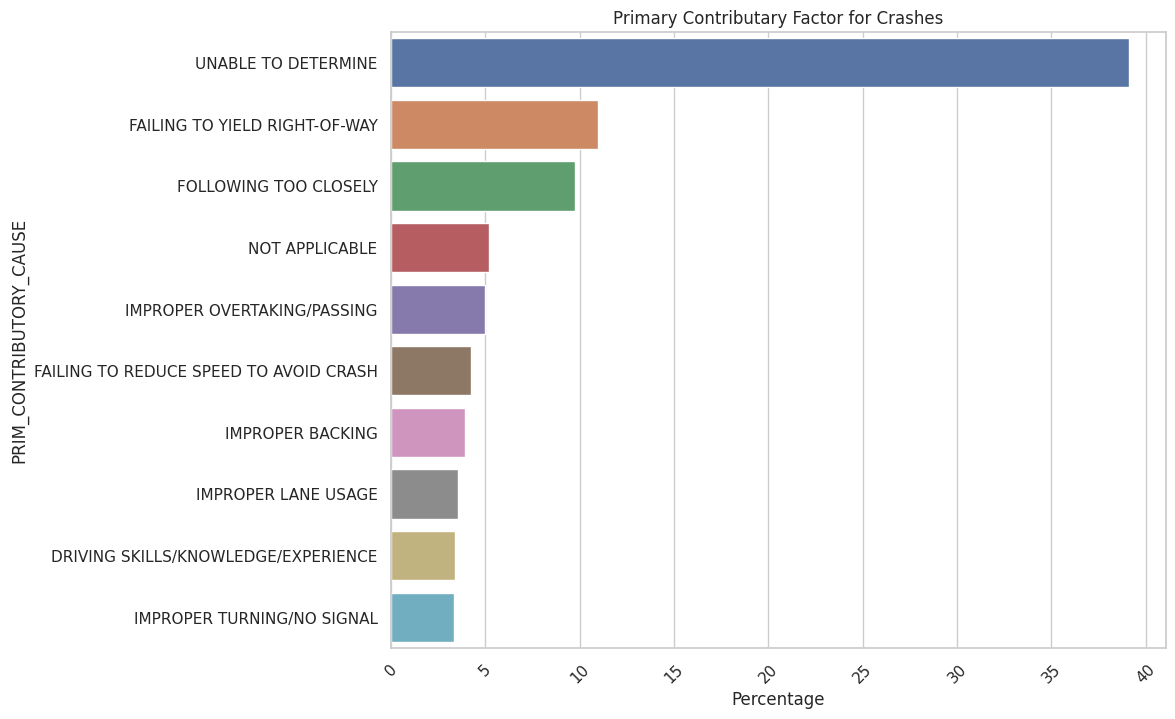

,PRIM_CONTRIBUTORY_CAUSE,count
0,UNABLE TO DETERMINE,39.102566
1,FAILING TO YIELD RIGHT-OF-WAY,10.992800
2,FOLLOWING TOO CLOSELY,9.757108
3,NOT APPLICABLE,5.197657
4,IMPROPER OVERTAKING/PASSING,5.014003
5,FAILING TO REDUCE SPEED TO AVOID CRASH,4.233444
6,IMPROPER BACKING,3.921011
7,IMPROPER LANE USAGE,3.561592
8,DRIVING SKILLS/KNOWLEDGE/EXPERIENCE,3.388031
9,IMPROPER TURNING/NO SIGNAL,3.377242


In [514]:
# Barplot of primary contributary factors of traffic crashes

top_10_causes = (final_merged_df['PRIM_CONTRIBUTORY_CAUSE'].value_counts(normalize=True)*100).nlargest(10).reset_index()
top_10_causes.columns = ['PRIM_CONTRIBUTORY_CAUSE', 'count']
plt.subplots(figsize=(10,8))
sns.barplot(x='count', y='PRIM_CONTRIBUTORY_CAUSE', orient='h', data=top_10_causes)
plt.title('Primary Contributary Factor for Crashes')
plt.xticks(rotation=45)
plt.xlabel('Percentage')
plt.show()
top_10_causes

**Observation:**

The horizontal barplot above shows the top 10 primary causes of traffic crashes as reported by the officer:

* `39%` of the traffic crashes reported, the reporting officer was unable to determine cause and `5%` of the traffic crashes primary contributary factors were recorded as `NOT APPLICABLE`.

* The chart suggests that in many crash cases, it is difficult to determine a clear contributory factor, hence the need for a model to make predictions on the possible primary cause for an accident.

* Other factors, ranked by decreasing percentage, include:
        "Failing to Yield Right-of-Way"
        "Following Too Closely"
        "Not Applicable"
        "Improper Overtaking/Passing"
        "Failing to Reduce Speed to Avoid Crash"
        "Improper Backing"
        "Improper Lane Usage"
        "Driving Skills/Knowledge/Experience"
        "Improper Turning/No Signal"

* Factors like "Failing to Yield Right-of-Way" and "Following Too Closely" are significant contributors to crashes.

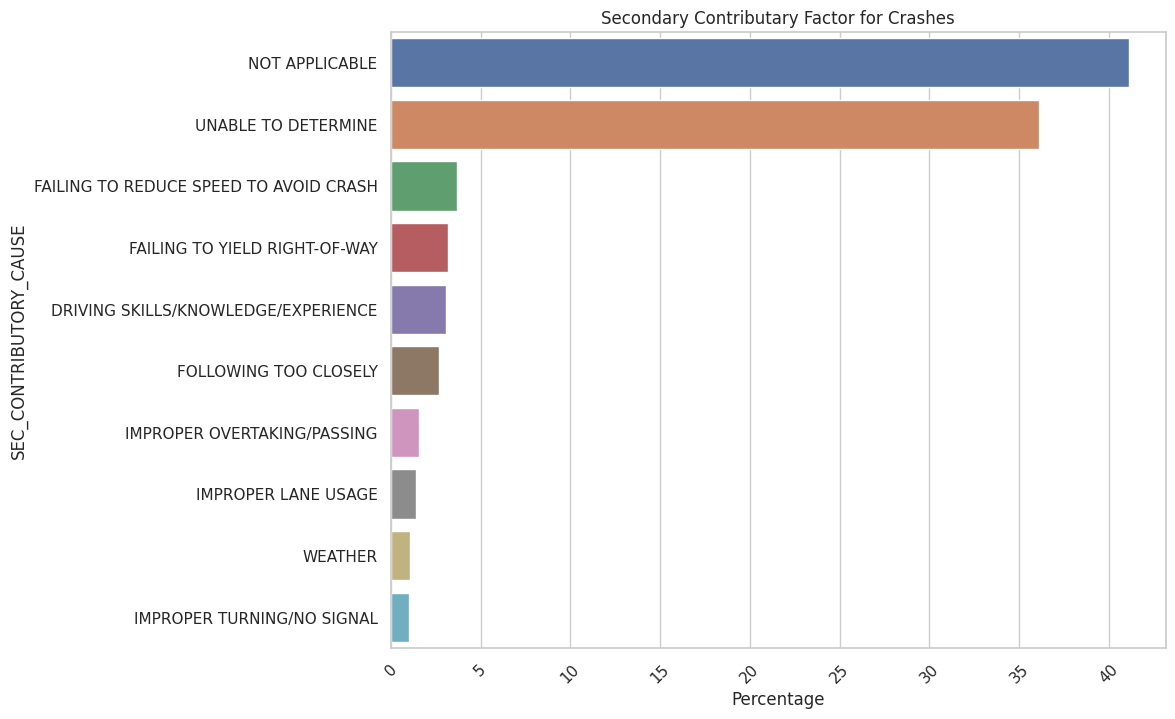

,SEC_CONTRIBUTORY_CAUSE,count
0,NOT APPLICABLE,41.117889
1,UNABLE TO DETERMINE,36.132194
2,FAILING TO REDUCE SPEED TO AVOID CRASH,3.716938
3,FAILING TO YIELD RIGHT-OF-WAY,3.183842
4,DRIVING SKILLS/KNOWLEDGE/EXPERIENCE,3.071538
5,FOLLOWING TOO CLOSELY,2.664900
6,IMPROPER OVERTAKING/PASSING,1.560307
7,IMPROPER LANE USAGE,1.411689
8,WEATHER,1.099373
9,IMPROPER TURNING/NO SIGNAL,1.042177


In [515]:
# Barplot of secondary contributary factors of traffic crashes

top_10_causes = (final_merged_df['SEC_CONTRIBUTORY_CAUSE'].value_counts(normalize=True)*100).nlargest(10).reset_index()
top_10_causes.columns = ['SEC_CONTRIBUTORY_CAUSE', 'count']
plt.subplots(figsize=(10,8))
sns.barplot(x='count', y='SEC_CONTRIBUTORY_CAUSE', orient='h', data=top_10_causes)
plt.title('Secondary Contributary Factor for Crashes')
plt.xticks(rotation=45)
plt.xlabel('Percentage')
plt.show()

top_10_causes

**Observation:**

The horizontal barplot above shows the top 10 secondary causes of traffic crashes as reported by the officer:

* `36%` of the traffic crashes reported, the reporting officer was unable to determine cause and `41%` of the traffic crashes primary contributary factors were recorded as `NOT APPLICABLE`.
* Factors like "DRIVING SKILLS/KNOWLEDGE/EXPERIENCE", "FAILING TO YIELD RIGHT-OF-WAY" and "FAILING TO REDUCE SPEED TO AVOID CRASH" are the highest secondary contributors to crashes as reported by the officer, though they're significantly low.

Split categorical and numerical columns in the merged dataset.

In [516]:
deduplicated_df = final_merged_df.select_dtypes('object')
print(deduplicated_df.columns)
print(deduplicated_df.shape)

Index(['CRASH_RECORD_ID', 'WEATHER_CONDITION', 'LIGHTING_CONDITION',
       'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'CRASH_TYPE', 'DAMAGE',
       'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'TRAFFICWAY_TYPE',
       'ALIGNMENT', 'UNIT_TYPE', 'MANEUVER', 'VEHICLE_DEFECT', 'VEHICLE_USE',
       'VEHICLE_TYPE', 'PERSON_TYPE', 'SEX', 'INJURY_CLASSIFICATION',
       'DRIVER_ACTION', 'PERSON_ID', 'DRIVER_VISION', 'PHYSICAL_CONDITION',
       'SAFETY_EQUIPMENT'],
      dtype='object')
(861946, 24)


In [517]:
deduplicated_df.isna().sum()

CRASH_RECORD_ID            0
WEATHER_CONDITION          0
LIGHTING_CONDITION         0
ROADWAY_SURFACE_COND       0
ROAD_DEFECT                0
CRASH_TYPE                 0
DAMAGE                     0
PRIM_CONTRIBUTORY_CAUSE    0
SEC_CONTRIBUTORY_CAUSE     0
TRAFFICWAY_TYPE            0
ALIGNMENT                  0
UNIT_TYPE                  0
MANEUVER                   0
VEHICLE_DEFECT             0
VEHICLE_USE                0
VEHICLE_TYPE               0
PERSON_TYPE                0
SEX                        0
INJURY_CLASSIFICATION      0
DRIVER_ACTION              0
PERSON_ID                  0
DRIVER_VISION              0
PHYSICAL_CONDITION         0
SAFETY_EQUIPMENT           0
dtype: int64

### DATA PREPARATION FOR MODELLING

DRIVER ACTION

In [518]:
# Define the categories and corresponding driver actions
driver_action_categories = {
    'Normal Behavior': [
        'NONE'
    ],
    'Unknown': [
        'UNKNOWN'
    ],
    'Failure to Yield/Traffic Violations': [
        'FAILED TO YIELD',
        'DISREGARDED CONTROL DEVICES',
        'STOPPED SCHOOL BUS',
        'LICENSE RESTRICTIONS',
        'OTHER'
    ],
    'Aggressive/Improper Driving': [
        'FOLLOWED TOO CLOSELY',
        'IMPROPER TURN',
        'IMPROPER BACKING',
        'IMPROPER LANE CHANGE',
        'IMPROPER PASSING',
        'TOO FAST FOR CONDITIONS',
        'IMPROPER PARKING',
        'WRONG WAY/SIDE',
        'OVERCORRECTED'
    ],
    'Distracted Driving': [
        'CELL PHONE USE OTHER THAN TEXTING',
        'TEXTING',
        'EVADING POLICE VEHICLE',
        'EMERGENCY VEHICLE ON CALL'
    ]
}

# Create a new column in crashes_final_df to categorize driver actions
def categorize_driver_action(action):
    for category, actions in driver_action_categories.items():
        if action in actions:
            return category

# Apply the categorization function to the 'DRIVER_ACTION' column
deduplicated_df['DRIVER_ACTION_CATEGORY'] = deduplicated_df['DRIVER_ACTION'].apply(categorize_driver_action)

MANEUVER

In [519]:
# Define the categories and corresponding maneuvers
maneuver_categories = {
    'Normal Driving': [
        'STRAIGHT AHEAD',
        'TURNING LEFT',
        'TURNING RIGHT',
        'TURNING ON RED'
    ],
    'Traffic Interactions': [
        'SLOW/STOP IN TRAFFIC',
        'ENTERING TRAFFIC LANE FROM PARKING',
        'MERGING',
        'PASSING/OVERTAKING',
        'CHANGING LANES',
        'AVOIDING VEHICLES/OBJECTS',
        'DRIVING WRONG WAY'
    ],
    'Parking and Stationary Actions': [
        'PARKED',
        'PARKED IN TRAFFIC LANE',
        'LEAVING TRAFFIC LANE TO PARK',
        'SLOW/STOP - LOAD/UNLOAD',
        'DRIVERLESS'
    ],
    'Reversal and Backing': [
        'BACKING',
        'ENTER FROM DRIVE/ALLEY',
        'U-TURN'
    ],
    'Unknown/Other': [
        'UNKNOWN/NA',
        'OTHER',
        'SLOW/STOP - LEFT TURN',
        'SLOW/STOP - RIGHT TURN',
        'SLOW/STOP - LOAD/UNLOAD',
        'SKIDDING/CONTROL LOSS',
        'STARTING IN TRAFFIC',
        'NEGOTIATING A CURVE',
        'DIVERGING',
        'DISABLED'
    ]
}

# Create a new column in crashes_final_df to categorize maneuvers
def categorize_maneuver(maneuver):
    for category, maneuvers in maneuver_categories.items():
        if maneuver in maneuvers:
            return category

# Apply the categorization function to the 'MANEUVER' column
deduplicated_df['MANEUVER_CATEGORY'] = deduplicated_df['MANEUVER'].apply(categorize_maneuver)

VEHICLE DEFECT

In [520]:
# Define the categories and corresponding vehicle defects
vehicle_defect_categories = {
    'No Defect': [
        'NONE'
    ],
    'Unknown': [
        'UNKNOWN'
    ],
    'Braking System Issues': [
        'BRAKES'
    ],
    'Tire and Wheel Issues': [
        'TIRES',
        'WHEELS',
        'STEERING',
        'SUSPENSION'
    ],
    'Mechanical/System Issues': [
        'ENGINE/MOTOR',
        'FUEL SYSTEM',
        'WINDOWS',
        'LIGHTS',
        'CARGO',
        'SIGNALS',
        'RESTRAINT SYSTEM',
        'TRAILER COUPLING',
        'EXHAUST',
        'OTHER'
    ]
}

# Create a new column in crashes_final_df to categorize vehicle defects
def categorize_vehicle_defect(defect):
    for category, defects in vehicle_defect_categories.items():
        if defect in defects:
            return category
        
# Apply the categorization function to the 'VEHICLE_DEFECT' column
deduplicated_df['VEHICLE_DEFECT_CATEGORY'] = deduplicated_df['VEHICLE_DEFECT'].apply(categorize_vehicle_defect)

VEHICLE TYPE

In [521]:
# Define the categories and corresponding vehicle types
vehicle_type_categories = {
    'Passenger Vehicles': [
        'PASSENGER',
        'VAN/MINI-VAN',
        'SPORT UTILITY VEHICLE (SUV)'
    ],
    'Trucks': [
        'PICKUP',
        'TRUCK - SINGLE UNIT',
        'SINGLE UNIT TRUCK WITH TRAILER',
        'TRACTOR W/ SEMI-TRAILER',
        'TRACTOR W/O SEMI-TRAILER'
    ],
    'Buses': [
        'BUS OVER 15 PASS.',
        'BUS UP TO 15 PASS.'
    ],
    'Motorcycles and Similar': [
        'MOTORCYCLE (OVER 150CC)',
        'MOPED OR MOTORIZED BICYCLE',
        '3-WHEELED MOTORCYCLE (2 REAR WHEELS)',
        'MOTOR DRIVEN CYCLE',
        'AUTOCYCLE',
        'ALL-TERRAIN VEHICLE (ATV)',
        'RECREATIONAL OFF-HIGHWAY VEHICLE (ROV)'
    ],
    'Unknown/Other': [
        'UNKNOWN/NA',
        'OTHER'
    ]
}

# Create a new column in crashes_final_df to categorize vehicle types
def categorize_vehicle_type(vehicle):
    for category, types in vehicle_type_categories.items():
        if vehicle in types:
            return category

# Apply the categorization function to the 'VEHICLE_TYPE' column
deduplicated_df['VEHICLE_TYPE_CATEGORY'] = deduplicated_df['VEHICLE_TYPE'].apply(categorize_vehicle_type)


VEHICLE USE

In [522]:
# Define the categories and corresponding vehicle uses
vehicle_use_categories = {
    'Personal Use': [
        'PERSONAL'
    ],
    'Unknown': [
        'UNKNOWN/NA'
    ],
    'Commercial Use': [
        'COMMERCIAL - SINGLE UNIT',
        'COMMERCIAL - MULTI-UNIT',
        'TAXI/FOR HIRE',
        'RIDESHARE SERVICE',
        'TOW TRUCK',
        'AMBULANCE',
        'POLICE',
        'FIRE',
        'CONSTRUCTION/MAINTENANCE',
        'SCHOOL BUS',
        'OTHER TRANSIT'
    ],
    'Public Transportation': [
        'MASS TRANSIT',
        'CTA'
    ],
    'Recreational and Special Use': [
        'CAMPER/RV - SINGLE UNIT',
        'CAMPER/RV - TOWED/MULTI-UNIT',
        'AGRICULTURE',
        'LAWN CARE/LANDSCAPING',
        'DRIVER EDUCATION',
        'STATE OWNED',
        'NOT IN USE',
        'OTHER'
    ]
}

# Create a new column in crashes_final_df to categorize vehicle uses
def categorize_vehicle_use(vehicle_use):
    for category, uses in vehicle_use_categories.items():
        if vehicle_use in uses:
            return category

# Apply the categorization function to the 'VEHICLE_USE' column
deduplicated_df['VEHICLE_USE_CATEGORY'] = deduplicated_df['VEHICLE_USE'].apply(categorize_vehicle_use)

DRIVER VISION

In [523]:
# Define the categories and corresponding driver vision conditions
driver_vision_categories = {
    'Normal Vision': [
        'NOT OBSCURED'
    ],
    'Unknown': [
        'UNKNOWN'
    ],
    'Obstructions': [
        'OTHER',
        'MOVING VEHICLES',
        'PARKED VEHICLES',
        'TREES, PLANTS',
        'BUILDINGS',
        'SIGNBOARD'
    ],
    'Environmental Conditions': [
        'WINDSHIELD (WATER/ICE)',
        'BLINDED - SUNLIGHT',
        'BLINDED - HEADLIGHTS',
        'BLOWING MATERIALS'
    ],
    'Topographical Factors': [
        'HILLCREST',
        'EMBANKMENT'
    ]
}

# Create a new column in crashes_final_df to categorize driver vision
def categorize_driver_vision(vision):
    for category, visions in driver_vision_categories.items():
        if vision in visions:
            return category

# Apply the categorization function to the 'DRIVER_VISION' column
deduplicated_df['DRIVER_VISION_CATEGORY'] = deduplicated_df['DRIVER_VISION'].apply(categorize_driver_vision)


PHYSICAL CONDITION

In [524]:
# Define the categories and corresponding physical conditions
physical_condition_categories = {
    'Normal': [
        'NORMAL'
    ],
    'Impaired': [
        'IMPAIRED - ALCOHOL',
        'IMPAIRED - DRUGS',
        'IMPAIRED - ALCOHOL AND DRUGS',
        'MEDICATED'
    ],
    'Fatigued': [
        'FATIGUED/ASLEEP'
    ],
    'Emotional': [
        'EMOTIONAL'
    ],
    'Unknown': [
        'UNKNOWN'
    ],
    'Other': [
        'OTHER',
        'REMOVED BY EMS',
        'ILLNESS/FAINTED',
        'HAD BEEN DRINKING'
    ]
}

# Create a new column in crashes_final_df to categorize physical condition
def categorize_physical_condition(condition):
    for category, conditions in physical_condition_categories.items():
        if condition in conditions:
            return category

# Apply the categorization function to the 'PHYSICAL_CONDITION' column
deduplicated_df['PHYSICAL_CONDITION_CATEGORY'] = deduplicated_df['PHYSICAL_CONDITION'].apply(categorize_physical_condition)

SAFETY EQUIPMENT

In [525]:
# Define the categories and corresponding safety equipment usage
safety_equipment_categories = {
    'Used': [
        'SAFETY BELT USED',
        'DOT COMPLIANT MOTORCYCLE HELMET',
        'HELMET USED',
        'SHOULD/LAP BELT USED IMPROPERLY',
        'CHILD RESTRAINT USED'
    ],
    'Not Used': [
        'SAFETY BELT NOT USED',
        'HELMET NOT USED',
        'NOT DOT COMPLIANT MOTORCYCLE HELMET',
        'WHEELCHAIR',
        'STRETCHER'
    ],
    'Unknown': [
        'USAGE UNKNOWN',
        'NONE PRESENT'
    ]
}

# Create a new column in crashes_final_df to categorize safety equipment usage
def categorize_safety_equipment(equipment):
    for category, items in safety_equipment_categories.items():
        if equipment in items:
            return category

# Apply the categorization function to the 'SAFETY_EQUIPMENT' column
deduplicated_df['SAFETY_EQUIPMENT_CATEGORY'] = deduplicated_df['SAFETY_EQUIPMENT'].apply(categorize_safety_equipment)

SEC_CONTRIBUTORY_CAUSE

In [526]:
# Define the categories and corresponding contributory causes for SEC_CONTRIBUTORY_CAUSE
sec_contributory_cause_categories = {
    'Driver Error': [
        'FAILING TO REDUCE SPEED TO AVOID CRASH',
        'FAILING TO YIELD RIGHT-OF-WAY',
        'DRIVING SKILLS/KNOWLEDGE/EXPERIENCE',
        'FOLLOWING TOO CLOSELY',
        'IMPROPER OVERTAKING/PASSING',
        'IMPROPER LANE USAGE',
        'IMPROPER TURNING/NO SIGNAL',
        'IMPROPER BACKING',
        'OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELESS, NEGLIGENT OR AGGRESSIVE MANNER',
        'DISREGARDING TRAFFIC SIGNALS',
        'DISREGARDING STOP SIGN',
        'DRIVING ON WRONG SIDE/WRONG WAY',
        'UNDER THE INFLUENCE OF ALCOHOL/DRUGS (USE WHEN ARREST IS EFFECTED)',
        'DISTRACTION - FROM INSIDE VEHICLE',
        'DISTRACTION - FROM OUTSIDE VEHICLE',
        'CELL PHONE USE OTHER THAN TEXTING',
        'TEXTING',
        'DISREGARDING OTHER TRAFFIC SIGNS',
        'DISREGARDING ROAD MARKINGS',
        'HAD BEEN DRINKING (USE WHEN ARREST IS NOT MADE)',
        'EVASIVE ACTION DUE TO ANIMAL, OBJECT, NONMOTORIST',
        'TURNING RIGHT ON RED',
        'BICYCLE ADVANCING LEGALLY ON RED LIGHT',
        'MOTORCYCLE ADVANCING LEGALLY ON RED LIGHT',
        'PASSING STOPPED SCHOOL BUS'
    ],
    'Vehicle Conditions': [
        'EQUIPMENT - VEHICLE CONDITION',
        'PHYSICAL CONDITION OF DRIVER',
        'VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS, ETC.)'
    ],
    'Environmental Factors / Other': [
        'NOT APPLICABLE',
        'UNABLE TO DETERMINE',
        'WEATHER',
        'ROAD ENGINEERING/SURFACE/MARKING DEFECTS',
        'ROAD CONSTRUCTION/MAINTENANCE',
        'ANIMAL',
        'RELATED TO BUS STOP',
        'UNKNOWN'  # If any additional unspecified cause needs to be categorized
    ]
}

# Create a new column in crashes_final_df to categorize 'SEC_CONTRIBUTORY_CAUSE'
def categorize_sec_contributory_cause(cause):
    for category, causes in sec_contributory_cause_categories.items():
        if cause in causes:
            return category
        
# Apply the categorization function to the 'SEC_CONTRIBUTORY_CAUSE' column
deduplicated_df['SEC_CONTRIBUTORY_CAUSE_CATEGORY'] = deduplicated_df['SEC_CONTRIBUTORY_CAUSE'].apply(categorize_sec_contributory_cause)

PRIM_CONTRIBUTORY_CAUSE

In [527]:
# Define the categories and corresponding contributory causes
contributory_cause_categories = {
    'Driver Error': [
        'FAILING TO YIELD RIGHT-OF-WAY',
        'FOLLOWING TOO CLOSELY',
        'IMPROPER OVERTAKING/PASSING',
        'FAILING TO REDUCE SPEED TO AVOID CRASH',
        'IMPROPER TURNING/NO SIGNAL',
        'IMPROPER LANE USAGE',
        'IMPROPER BACKING',
        'DRIVING SKILLS/KNOWLEDGE/EXPERIENCE',
        'DISREGARDING TRAFFIC SIGNALS',
        'DISREGARDING STOP SIGN',
        'OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELESS, NEGLIGENT OR AGGRESSIVE MANNER',
        'DISTRACTION - FROM INSIDE VEHICLE',
        'DISTRACTION - FROM OUTSIDE VEHICLE',
        'UNDER THE INFLUENCE OF ALCOHOL/DRUGS (USE WHEN ARREST IS EFFECTED)',
        'DRIVING ON WRONG SIDE/WRONG WAY',
        'CELL PHONE USE OTHER THAN TEXTING',
        'TEXTING',
        'DISREGARDING YIELD SIGN',
        'PASSING STOPPED SCHOOL BUS',
        'OBSTRUCTED CROSSWALKS',
        'BICYCLE ADVANCING LEGALLY ON RED LIGHT',
        'MOTORCYCLE ADVANCING LEGALLY ON RED LIGHT'
    ],
    'Vehicle Conditions': [
        'EQUIPMENT - VEHICLE CONDITION',
        'PHYSICAL CONDITION OF DRIVER',
        'VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS, ETC.)'
    ],
    'Environmental Factors / Other': [
        'UNABLE TO DETERMINE',
        'NOT APPLICABLE',
        'WEATHER',
        'ROAD ENGINEERING/SURFACE/MARKING DEFECTS',
        'DISREGARDING OTHER TRAFFIC SIGNS',
        'ROAD CONSTRUCTION/MAINTENANCE',
        'EVASIVE ACTION DUE TO ANIMAL, OBJECT, NONMOTORIST',
        'EXCEEDING AUTHORIZED SPEED LIMIT',
        'EXCEEDING SAFE SPEED FOR CONDITIONS',
        'DISTRACTION - OTHER ELECTRONIC DEVICE (NAVIGATION DEVICE, DVD PLAYER, ETC.)',
        'ANIMAL',
        'TURNING RIGHT ON RED',
        'HAD BEEN DRINKING (USE WHEN ARREST IS NOT MADE)',
        'RELATED TO BUS STOP',
        'UNKNOWN' 
    ]
}

# Create a new column in crashes_final_df to categorize 'PRIM_CONTRIBUTORY_CAUSE'
def categorize_contributory_cause(cause):
    for category, causes in contributory_cause_categories.items():
        if cause in causes:
            return category

# Apply the categorization function to the 'PRIM_CONTRIBUTORY_CAUSE' column
deduplicated_df['PRIM_CONTRIBUTORY_CAUSE_CATEGORY'] = deduplicated_df['PRIM_CONTRIBUTORY_CAUSE'].apply(categorize_contributory_cause)

ROAD DEFECT

In [528]:
# Define the categories and corresponding road defects
road_defect_categories = {
    'No Defects': ['NO DEFECTS'],
    'Minor Defects': ['RUT, HOLES', 'OTHER', 'WORN SURFACE', 'SHOULDER DEFECT', 'DEBRIS ON ROADWAY'],
    'Major Defects / Unknown': ['UNKNOWN']
}

# Create a new column in crashes_final_df to categorize 'ROAD_DEFECT'
def categorize_road_defect(defect):
    for category, defects in road_defect_categories.items():
        if defect in defects:
            return category

# Apply the categorization function to the 'ROAD_DEFECT' column
deduplicated_df['ROAD_DEFECT_CATEGORY'] = deduplicated_df['ROAD_DEFECT'].apply(categorize_road_defect)

ROADWAY_SURFACE_COND

In [529]:
# Define the categories and corresponding roadway surface conditions
roadway_surface_categories = {
    'Normal/Dry Conditions': ['DRY'],
    'Wet/Slippery Conditions': ['WET', 'SNOW OR SLUSH', 'ICE', 'SAND, MUD, DIRT'],
    'Unknown/Other Conditions': ['UNKNOWN', 'OTHER']
}

# Create a new column in crashes_final_df to categorize 'ROADWAY_SURFACE_COND'
def categorize_roadway_surface(condition):
    for category, conditions in roadway_surface_categories.items():
        if condition in conditions:
            return category

# Apply the categorization function to the 'ROADWAY_SURFACE_COND' column
deduplicated_df['ROADWAY_SURFACE_CATEGORY'] = deduplicated_df['ROADWAY_SURFACE_COND'].apply(categorize_roadway_surface)

ALIGNMENT

In [530]:
# Define the categories and corresponding alignment types
alignment_categories = {
    'Straight Roads': ['STRAIGHT AND LEVEL', 'STRAIGHT ON GRADE'],
    'Curved Roads': ['CURVE, LEVEL', 'CURVE ON GRADE', 'CURVE ON HILLCREST'],
    'Hill-Related Roads': ['STRAIGHT ON HILLCREST']
}

# Create a new column in crashes_final_df to categorize 'ALIGNMENT'
def categorize_alignment(alignment):
    for category, types in alignment_categories.items():
        if alignment in types:
            return category

# Apply the categorization function to the 'ALIGNMENT' column
deduplicated_df['ALIGNMENT_CATEGORY'] = deduplicated_df['ALIGNMENT'].apply(categorize_alignment)

TRAFFICWAY_TYPE

In [531]:
# Define the categories and corresponding trafficway types
trafficway_type_categories = {
    'Divided Roads': ['DIVIDED - W/MEDIAN (NOT RAISED)', 'DIVIDED - W/MEDIAN BARRIER', 'CENTER TURN LANE', 'RAMP'],
    'Undivided Roads': ['NOT DIVIDED', 'ONE-WAY', 'FOUR WAY', 'PARKING LOT', 'TRAFFIC ROUTE'],
    'Intersection Types': ['T-INTERSECTION', 'Y-INTERSECTION', 'FIVE POINT, OR MORE', 'L-INTERSECTION', 'ROUNDABOUT'],
    'Other/Unclassified Types': ['ALLEY', 'UNKNOWN', 'UNKNOWN INTERSECTION TYPE', 'OTHER', 'NOT REPORTED', 'DRIVEWAY']
}

# Create a new column in crashes_final_df to categorize 'TRAFFICWAY_TYPE'
def categorize_trafficway_type(trafficway_type):
    for category, types in trafficway_type_categories.items():
        if trafficway_type in types:
            return category

# Apply the categorization function to the 'TRAFFICWAY_TYPE' column
deduplicated_df['TRAFFICWAY_TYPE_CATEGORY'] = deduplicated_df['TRAFFICWAY_TYPE'].apply(categorize_trafficway_type)

WEATHER_CONDITION

In [532]:
#Define the categories and corresponding weather conditions
weather_condition_categories = {
    'Clear/Normal Conditions': ['CLEAR', 'CLOUDY/OVERCAST'],
    'Precipitation/Adverse Conditions': ['RAIN', 'SNOW', 'FREEZING RAIN/DRIZZLE', 'SLEET/HAIL', 'FOG/SMOKE/HAZE', 
                                         'BLOWING SNOW', 'SEVERE CROSS WIND GATE', 'BLOWING SAND, SOIL, DIRT'],
    'Unknown/Other': ['UNKNOWN', 'OTHER']
}

# Create a new column in crashes_final_df to categorize 'WEATHER_CONDITION'
def categorize_weather_condition(condition):
    for category, conditions in weather_condition_categories.items():
        if condition in conditions:
            return category
        
# Apply the categorization function to the 'WEATHER_CONDITION' column
deduplicated_df['WEATHER_CONDITION_CATEGORY'] = deduplicated_df['WEATHER_CONDITION'].apply(categorize_weather_condition)

LIGHTING_CONDITION

In [533]:
# Define the categories and corresponding lighting conditions
lighting_condition_categories = {
    'Daylight': ['DAYLIGHT'],
    'Low Light Conditions': ['DARKNESS, LIGHTED ROAD', 'DARKNESS', 'DUSK', 'DAWN'],
    'Unknown/Other': ['UNKNOWN']
}

# Create a new column in crashes_final_df to categorize 'LIGHTING_CONDITION'
def categorize_lighting_condition(condition):
    for category, conditions in lighting_condition_categories.items():
        if condition in conditions:
            return category
    
# Apply the categorization function to the 'LIGHTING_CONDITION' column
deduplicated_df['LIGHTING_CONDITION_CATEGORY'] = deduplicated_df['LIGHTING_CONDITION'].apply(categorize_lighting_condition)

Let's look at the number of columns we have in our dataset

In [534]:
print(deduplicated_df.columns)
print('\n')
print(f'There are {deduplicated_df.shape[0]} rows and {deduplicated_df.shape[1]} columns')

Index(['CRASH_RECORD_ID', 'WEATHER_CONDITION', 'LIGHTING_CONDITION',
       'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'CRASH_TYPE', 'DAMAGE',
       'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'TRAFFICWAY_TYPE',
       'ALIGNMENT', 'UNIT_TYPE', 'MANEUVER', 'VEHICLE_DEFECT', 'VEHICLE_USE',
       'VEHICLE_TYPE', 'PERSON_TYPE', 'SEX', 'INJURY_CLASSIFICATION',
       'DRIVER_ACTION', 'PERSON_ID', 'DRIVER_VISION', 'PHYSICAL_CONDITION',
       'SAFETY_EQUIPMENT', 'DRIVER_ACTION_CATEGORY', 'MANEUVER_CATEGORY',
       'VEHICLE_DEFECT_CATEGORY', 'VEHICLE_TYPE_CATEGORY',
       'VEHICLE_USE_CATEGORY', 'DRIVER_VISION_CATEGORY',
       'PHYSICAL_CONDITION_CATEGORY', 'SAFETY_EQUIPMENT_CATEGORY',
       'SEC_CONTRIBUTORY_CAUSE_CATEGORY', 'PRIM_CONTRIBUTORY_CAUSE_CATEGORY',
       'ROAD_DEFECT_CATEGORY', 'ROADWAY_SURFACE_CATEGORY',
       'ALIGNMENT_CATEGORY', 'TRAFFICWAY_TYPE_CATEGORY',
       'WEATHER_CONDITION_CATEGORY', 'LIGHTING_CONDITION_CATEGORY'],
      dtype='object')


There are 8619

There is need for us to drop majority of them to avoid duplication

In [535]:
deduplicated_df = deduplicated_df.drop(columns=[
    'WEATHER_CONDITION', 'LIGHTING_CONDITION',
    'TRAFFICWAY_TYPE', 'ALIGNMENT',
    'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'PRIM_CONTRIBUTORY_CAUSE',
    'SEC_CONTRIBUTORY_CAUSE', 'MANEUVER', 'VEHICLE_DEFECT', 'VEHICLE_TYPE', 
    'VEHICLE_USE', 'PHYSICAL_CONDITION', 'DRIVER_ACTION', 'DRIVER_VISION',
    'SAFETY_EQUIPMENT'], axis=1)

print(deduplicated_df.columns)
print('\n')
print(f'There are {deduplicated_df.shape[0]} rows and {deduplicated_df.shape[1]} columns')

Index(['CRASH_RECORD_ID', 'CRASH_TYPE', 'DAMAGE', 'UNIT_TYPE', 'PERSON_TYPE',
       'SEX', 'INJURY_CLASSIFICATION', 'PERSON_ID', 'DRIVER_ACTION_CATEGORY',
       'MANEUVER_CATEGORY', 'VEHICLE_DEFECT_CATEGORY', 'VEHICLE_TYPE_CATEGORY',
       'VEHICLE_USE_CATEGORY', 'DRIVER_VISION_CATEGORY',
       'PHYSICAL_CONDITION_CATEGORY', 'SAFETY_EQUIPMENT_CATEGORY',
       'SEC_CONTRIBUTORY_CAUSE_CATEGORY', 'PRIM_CONTRIBUTORY_CAUSE_CATEGORY',
       'ROAD_DEFECT_CATEGORY', 'ROADWAY_SURFACE_CATEGORY',
       'ALIGNMENT_CATEGORY', 'TRAFFICWAY_TYPE_CATEGORY',
       'WEATHER_CONDITION_CATEGORY', 'LIGHTING_CONDITION_CATEGORY'],
      dtype='object')


There are 861946 rows and 24 columns


In [536]:
# Selecting only numerical columns from the DataFrame
numerical_columns_df = final_merged_df.select_dtypes(include='number')

Merging both the categorical variables and numerical variables

In [537]:
deduplicated_df = pd.concat([deduplicated_df, numerical_columns_df], axis=1)

# show the first 5 rows
deduplicated_df.head()

,CRASH_RECORD_ID,CRASH_TYPE,DAMAGE,UNIT_TYPE,PERSON_TYPE,SEX,INJURY_CLASSIFICATION,PERSON_ID,DRIVER_ACTION_CATEGORY,MANEUVER_CATEGORY,...,ALIGNMENT_CATEGORY,TRAFFICWAY_TYPE_CATEGORY,WEATHER_CONDITION_CATEGORY,LIGHTING_CONDITION_CATEGORY,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,AGE
14,5f54a59fcb087b12ae5b1acff96a3caf4f2d37e79f8db4...,NO INJURY / DRIVE AWAY,"OVER $1,500",DRIVER,DRIVER,X,NO INDICATION OF INJURY,O1628206,Aggressive/Improper Driving,Normal Driving,...,Straight Roads,Divided Roads,Clear/Normal Conditions,Daylight,14,7,7,41.854120,-87.665902,-1.0
90,fd05285e9d273fe20cbbebf84794045828a2ba589073b6...,NO INJURY / DRIVE AWAY,"$501 - $1,500",DRIVER,DRIVER,F,NO INDICATION OF INJURY,O1631320,Unknown,Reversal and Backing,...,Straight Roads,Undivided Roads,Unknown/Other,Unknown/Other,14,7,7,41.809781,-87.594213,73.0
94,fda2491d33ac819033f4aaa7ed901120f2f6785b7e5bbb...,NO INJURY / DRIVE AWAY,"OVER $1,500",DRIVER,DRIVER,F,NO INDICATION OF INJURY,O1629350,Failure to Yield/Traffic Violations,Unknown/Other,...,Straight Roads,Undivided Roads,Clear/Normal Conditions,Low Light Conditions,0,7,7,41.899225,-87.696642,-1.0
127,4a1f7a24129e5e1d4a7a2fd44ab6f8822a20bcdb2f627f...,NO INJURY / DRIVE AWAY,"OVER $1,500",DRIVER,DRIVER,F,NO INDICATION OF INJURY,O1638007,Unknown,Normal Driving,...,Straight Roads,Undivided Roads,Clear/Normal Conditions,Daylight,10,1,8,41.975853,-87.709134,33.0
139,1ee2180a89cc02c0b756f95b5b2755bb5cc9d93450f5ca...,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",DRIVER,DRIVER,F,NONINCAPACITATING INJURY,O1635781,Unknown,Normal Driving,...,Straight Roads,Undivided Roads,Clear/Normal Conditions,Daylight,19,4,8,41.758246,-87.626522,33.0


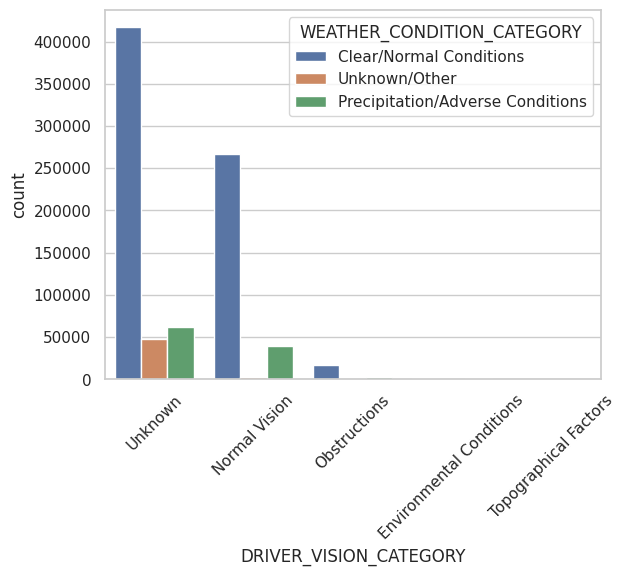

In [538]:
pd.crosstab(deduplicated_df.WEATHER_CONDITION_CATEGORY, deduplicated_df.DRIVER_VISION_CATEGORY)

sns.set(style="whitegrid")
sns.countplot(x='DRIVER_VISION_CATEGORY', hue='WEATHER_CONDITION_CATEGORY', data=deduplicated_df)
plt.xticks(rotation=45)
plt.show();

In [539]:
deduplicated_df.isna().sum()

CRASH_RECORD_ID                        0
CRASH_TYPE                             0
DAMAGE                                 0
UNIT_TYPE                              0
PERSON_TYPE                            0
SEX                                    0
INJURY_CLASSIFICATION                  0
PERSON_ID                              0
DRIVER_ACTION_CATEGORY                 0
MANEUVER_CATEGORY                      0
VEHICLE_DEFECT_CATEGORY                0
VEHICLE_TYPE_CATEGORY               1291
VEHICLE_USE_CATEGORY                  45
DRIVER_VISION_CATEGORY                 0
PHYSICAL_CONDITION_CATEGORY            0
SAFETY_EQUIPMENT_CATEGORY              0
SEC_CONTRIBUTORY_CAUSE_CATEGORY     3406
PRIM_CONTRIBUTORY_CAUSE_CATEGORY     980
ROAD_DEFECT_CATEGORY                   0
ROADWAY_SURFACE_CATEGORY               0
ALIGNMENT_CATEGORY                     0
TRAFFICWAY_TYPE_CATEGORY               0
WEATHER_CONDITION_CATEGORY             0
LIGHTING_CONDITION_CATEGORY            0
CRASH_HOUR      

Dropping the Null values in `VEHICLE_TYPE_CATEGORY`, `VEHICLE_USE_CATEGORY`, `SEC_CONTRIBUTORY_CAUSE_CATEGORY` and `PRIM_CONTRIBUTORY_CAUSE_CATEGORY`

Check the shape of the dataset

In [547]:
deduplicated_df = deduplicated_df.dropna()

print(f'The dataset have {deduplicated_df.shape[0]} rows and {deduplicated_df.shape[1]} columns')

The dataset have 856235 rows and 30 columns


Do Label encoding of `PRIM_CONTRIBUTORY_CAUSE_CATEGORY' into numerical variable and it will be used as the target

In [546]:
# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Fit and transform the PRIM_CONTRIBUTORY_CAUSE_CATEGORY column to numerical values
deduplicated_df['CAUSE'] = label_encoder.fit_transform(deduplicated_df['PRIM_CONTRIBUTORY_CAUSE_CATEGORY'])

deduplicated_df = deduplicated_df.drop(columns='PRIM_CONTRIBUTORY_CAUSE_CATEGORY', axis=1)

# Check the mapping
print(dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))
print('\n')

# Display the dataframe with the new numerical column
deduplicated_df.head()

{'Driver Error': 0, 'Environmental Factors / Other': 1, 'Vehicle Conditions': 2}




,CRASH_RECORD_ID,CRASH_TYPE,DAMAGE,UNIT_TYPE,PERSON_TYPE,SEX,INJURY_CLASSIFICATION,PERSON_ID,DRIVER_ACTION_CATEGORY,MANEUVER_CATEGORY,...,TRAFFICWAY_TYPE_CATEGORY,WEATHER_CONDITION_CATEGORY,LIGHTING_CONDITION_CATEGORY,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,AGE,CAUSE
14,5f54a59fcb087b12ae5b1acff96a3caf4f2d37e79f8db4...,NO INJURY / DRIVE AWAY,"OVER $1,500",DRIVER,DRIVER,X,NO INDICATION OF INJURY,O1628206,Aggressive/Improper Driving,Normal Driving,...,Divided Roads,Clear/Normal Conditions,Daylight,14,7,7,41.854120,-87.665902,-1.0,0
90,fd05285e9d273fe20cbbebf84794045828a2ba589073b6...,NO INJURY / DRIVE AWAY,"$501 - $1,500",DRIVER,DRIVER,F,NO INDICATION OF INJURY,O1631320,Unknown,Reversal and Backing,...,Undivided Roads,Unknown/Other,Unknown/Other,14,7,7,41.809781,-87.594213,73.0,1
94,fda2491d33ac819033f4aaa7ed901120f2f6785b7e5bbb...,NO INJURY / DRIVE AWAY,"OVER $1,500",DRIVER,DRIVER,F,NO INDICATION OF INJURY,O1629350,Failure to Yield/Traffic Violations,Unknown/Other,...,Undivided Roads,Clear/Normal Conditions,Low Light Conditions,0,7,7,41.899225,-87.696642,-1.0,1
127,4a1f7a24129e5e1d4a7a2fd44ab6f8822a20bcdb2f627f...,NO INJURY / DRIVE AWAY,"OVER $1,500",DRIVER,DRIVER,F,NO INDICATION OF INJURY,O1638007,Unknown,Normal Driving,...,Undivided Roads,Clear/Normal Conditions,Daylight,10,1,8,41.975853,-87.709134,33.0,1
139,1ee2180a89cc02c0b756f95b5b2755bb5cc9d93450f5ca...,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",DRIVER,DRIVER,F,NONINCAPACITATING INJURY,O1635781,Unknown,Normal Driving,...,Undivided Roads,Clear/Normal Conditions,Daylight,19,4,8,41.758246,-87.626522,33.0,1


#### TRAIN-TEST SPLIT

In [576]:
# Split the data into training and testing data at 80,20 ratio
X = deduplicated_df.drop(['PERSON_ID','CRASH_RECORD_ID', 'LATITUDE', 'LONGITUDE', 'CAUSE'], axis=1)
y = deduplicated_df['CAUSE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [577]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((684988, 25), (171247, 25))

In [578]:
X_train.columns

Index(['CRASH_TYPE', 'DAMAGE', 'UNIT_TYPE', 'PERSON_TYPE', 'SEX',
       'INJURY_CLASSIFICATION', 'DRIVER_ACTION_CATEGORY', 'MANEUVER_CATEGORY',
       'VEHICLE_DEFECT_CATEGORY', 'VEHICLE_TYPE_CATEGORY',
       'VEHICLE_USE_CATEGORY', 'DRIVER_VISION_CATEGORY',
       'PHYSICAL_CONDITION_CATEGORY', 'SAFETY_EQUIPMENT_CATEGORY',
       'SEC_CONTRIBUTORY_CAUSE_CATEGORY', 'ROAD_DEFECT_CATEGORY',
       'ROADWAY_SURFACE_CATEGORY', 'ALIGNMENT_CATEGORY',
       'TRAFFICWAY_TYPE_CATEGORY', 'WEATHER_CONDITION_CATEGORY',
       'LIGHTING_CONDITION_CATEGORY', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK',
       'CRASH_MONTH', 'AGE'],
      dtype='object')

### Preprocessing

I've used onehotencoder to convert each categorical value into a new binary column with 0 or 1 for each unique value.

Split categorical and numerical columns in the merged dataset.

In [579]:
len(X_train.columns)

25

In [580]:
X_train.mode()

,CRASH_TYPE,DAMAGE,UNIT_TYPE,PERSON_TYPE,SEX,INJURY_CLASSIFICATION,DRIVER_ACTION_CATEGORY,MANEUVER_CATEGORY,VEHICLE_DEFECT_CATEGORY,VEHICLE_TYPE_CATEGORY,...,ROAD_DEFECT_CATEGORY,ROADWAY_SURFACE_CATEGORY,ALIGNMENT_CATEGORY,TRAFFICWAY_TYPE_CATEGORY,WEATHER_CONDITION_CATEGORY,LIGHTING_CONDITION_CATEGORY,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,AGE
0,NO INJURY / DRIVE AWAY,"OVER $1,500",DRIVER,DRIVER,M,NO INDICATION OF INJURY,Unknown,Normal Driving,Unknown,Passenger Vehicles,...,No Defects,Normal/Dry Conditions,Straight Roads,Undivided Roads,Clear/Normal Conditions,Daylight,15.0,6.0,9.0,-1.0


In [581]:
# Identify categorical and numerical columns
categorical_columns = X_train.select_dtypes(include=['object', 'category']).columns
numerical_columns = X_train.select_dtypes(include=['int64', 'float64']).columns

# Create the OneHotEncoder
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')

# Create a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_columns),
        ('cat', ohe, categorical_columns)
    ])

# Fit the preprocessor on X_train and transform both X_train and X_test
X_train_encoded = preprocessor.fit_transform(X_train)
X_test_encoded = preprocessor.transform(X_test)

# Get feature names after encoding
def get_feature_names(column_transformer):
    """Get feature names from all transformers."""
    output_features = []
    
    for name, pipe, features in column_transformer.transformers_:
        if name != 'remainder':
            if hasattr(pipe, 'get_feature_names_out'):
                if isinstance(features, str):
                    output_features.extend(pipe.get_feature_names_out([features]))
                else:
                    output_features.extend(pipe.get_feature_names_out(features))
            elif hasattr(pipe, 'get_feature_names'):
                output_features.extend(pipe.get_feature_names(features))
            else:
                output_features.extend(features)
    
    return output_features

feature_names = get_feature_names(preprocessor)

# Convert to DataFrames
X_train_encoded = pd.DataFrame(X_train_encoded, columns=feature_names)
X_test_encoded = pd.DataFrame(X_test_encoded, columns=feature_names)

print("Shape of X_train after encoding:", X_train_encoded.shape)
print('\n')
print("Shape of X_test after encoding:", X_test_encoded.shape)
print('\n')
print("Number of categorical columns encoded:", len(categorical_columns))
print('\n')
print("Total number of features after encoding:", len(feature_names))
print('\n')

# Display first few rows and columns of encoded data
print("\nFirst few columns of encoded X_train:")
print('\n')
X_train_encoded.iloc[:5, :10]

Shape of X_train after encoding: (684988, 84)


Shape of X_test after encoding: (171247, 84)


Number of categorical columns encoded: 21


Total number of features after encoding: 84



First few columns of encoded X_train:




,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,AGE,CRASH_TYPE_INJURY AND / OR TOW DUE TO CRASH,CRASH_TYPE_NO INJURY / DRIVE AWAY,DAMAGE_$500 OR LESS,"DAMAGE_$501 - $1,500","DAMAGE_OVER $1,500",UNIT_TYPE_DISABLED VEHICLE
0,20.0,5.0,12.0,67.0,0.0,1.0,0.0,0.0,1.0,0.0
1,18.0,4.0,7.0,41.0,0.0,1.0,0.0,0.0,1.0,0.0
2,5.0,1.0,5.0,-1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,9.0,7.0,12.0,24.0,1.0,0.0,0.0,1.0,0.0,0.0
4,22.0,4.0,1.0,-1.0,0.0,1.0,0.0,0.0,1.0,0.0


### Addressing Class Imbalance

The target classes in the target feature are not evenly distributed as illustrated below.

CAUSE
0.0    0.507834
1.0    0.474600
2.0    0.017566
Name: proportion, dtype: float64


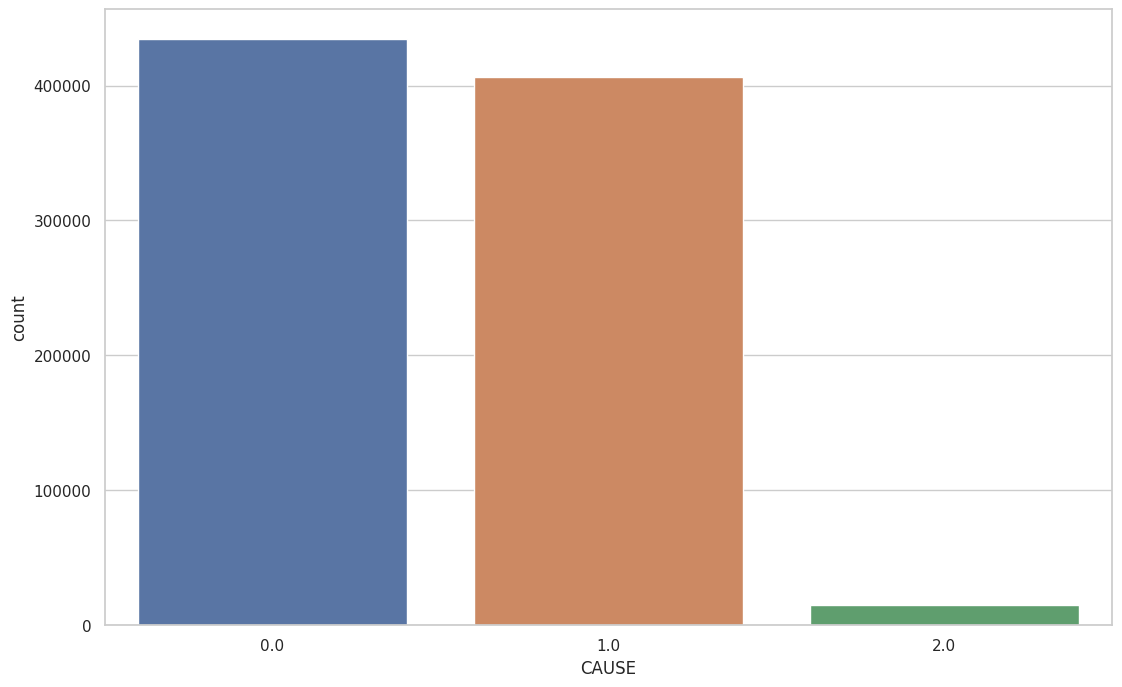

In [558]:
# Countplot of churn feature
plt.subplots(figsize=(13,8))
print(deduplicated_df['CAUSE'].value_counts(normalize=True))
sns.countplot(data=deduplicated_df, x='CAUSE')
plt.show()

CAUSE
1    0.333333
0    0.333333
2    0.333333
Name: proportion, dtype: float64


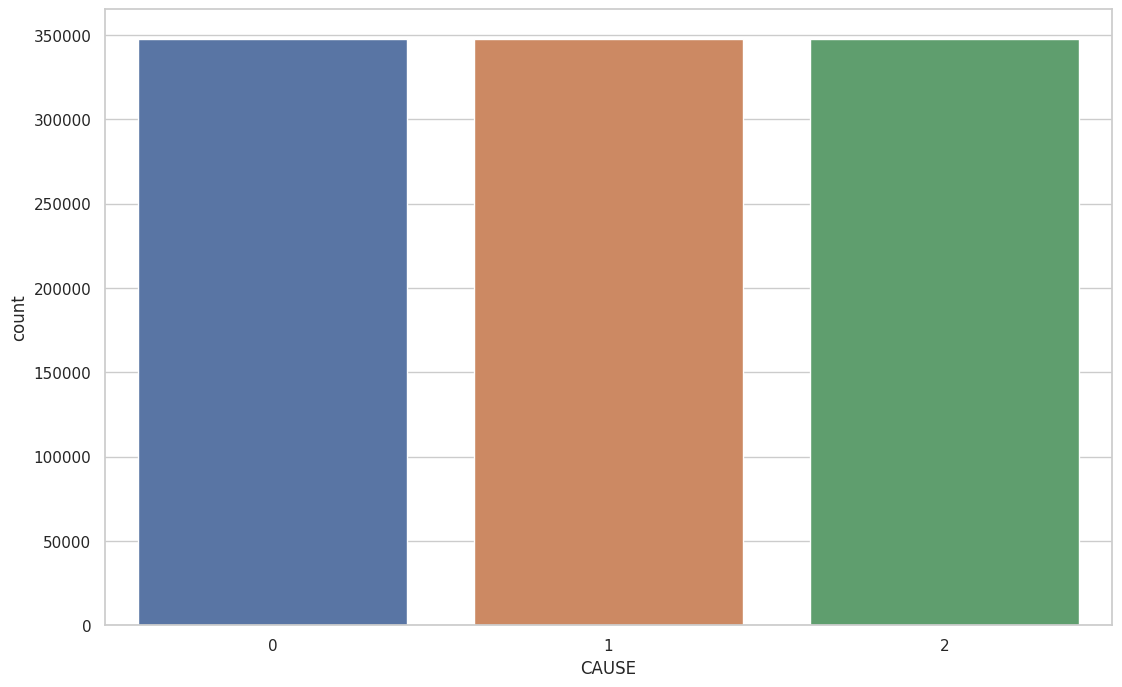

In [562]:
smote = SMOTE()
X_train_encoded.columns = [str(col) for col in X_train_encoded.columns]
plt.subplots(figsize=(13,8))
y_train.name = 'CAUSE'
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_encoded, y_train)
print(y_train_resampled.value_counts(normalize=True))
sns.countplot(data=y_train_resampled, x=y_train_resampled.index)
plt.show();

## Modelling - White box models
***
### Model 1 : Logistic Regression Classifier

* Logistic Regression is a type of classification algorithm under supervised machine learning that predicts the probability of a classification outcome based on one or more predictor variables.In this project, the target variable(cause of traffic crash) is a multiclass classification.

* This will serve as the base model.



#### Model Training and Prediction

In [582]:
# Logistic Regression pipeline with best parameters
logpipe = Pipeline(steps=[
    ('ss', StandardScaler()),
    ('classifier', LogisticRegression(fit_intercept=False, solver='liblinear', C=1e12, random_state=42, class_weight='balanced'))
])

logpipe.fit(X_train_encoded, y_train)

# Predict for both X_train and X_test
y_hat_train = logpipe.predict(X_train_encoded)
y_hat_test = logpipe.predict(X_test_encoded)

#### Model Evaluation

**Precision:** Measures the proportion of positive predictions that were actually correct.

**Recall:** Measures the proportion of actual positive cases that were correctly predicted.

**Accuracy:** Measures the overall proportion of correct predictions (both positive and negative).

**F1-Score:** The harmonic mean of precision and recall, providing a balanced measure of both.

Training Precision (Weighted):  0.7993505150576554
Testing Precision (Weighted):  0.801289323255472



Training Recall (Weighted):  0.7600541907303485
Testing Recall (Weighted):  0.7618118857556628



Training Accuracy:  0.7600541907303485
Testing Accuracy:  0.7618118857556628



Training F1-Score (Weighted):  0.7747932500679333
Testing F1-Score (Weighted):  0.7766173156557351


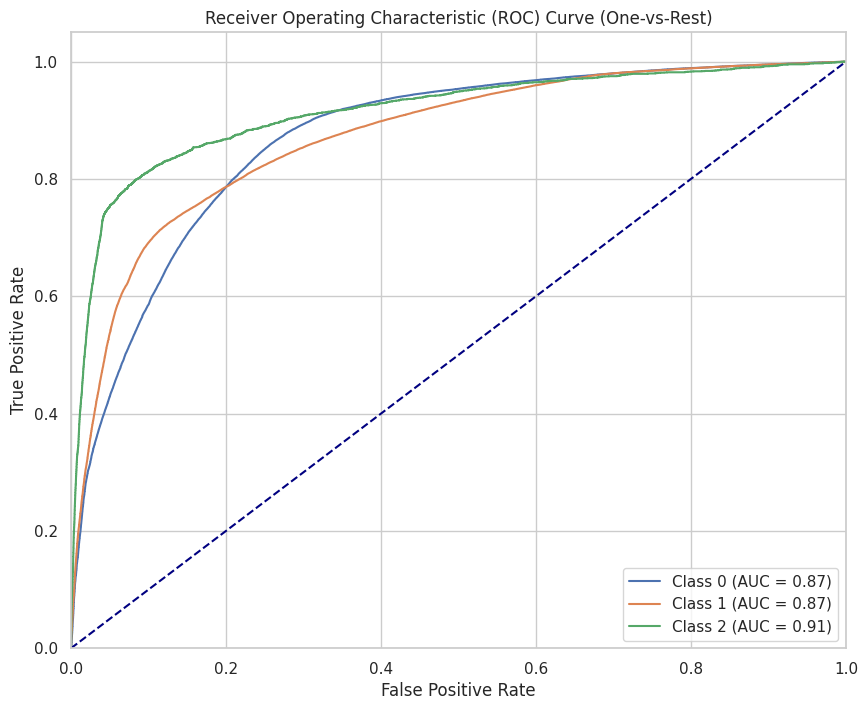

In [583]:
# Evaluation of Model
# Use 'weighted' average for multiclass classification metrics
print('Training Precision (Weighted): ', precision_score(y_train, y_hat_train, average='weighted'))
print('Testing Precision (Weighted): ', precision_score(y_test, y_hat_test, average='weighted'))
print('\n\n')

print('Training Recall (Weighted): ', recall_score(y_train, y_hat_train, average='weighted'))
print('Testing Recall (Weighted): ', recall_score(y_test, y_hat_test, average='weighted'))
print('\n\n')

print('Training Accuracy: ', accuracy_score(y_train, y_hat_train))
print('Testing Accuracy: ', accuracy_score(y_test, y_hat_test))
print('\n\n')

print('Training F1-Score (Weighted): ', f1_score(y_train, y_hat_train, average='weighted'))
print('Testing F1-Score (Weighted): ', f1_score(y_test, y_hat_test, average='weighted'))

# Multiclass ROC-AUC
y_score = logpipe.decision_function(X_test_encoded)

# roc_curve for multiclass (One-vs-Rest approach)
fpr = {}
tpr = {}
roc_auc = {}
n_classes = len(logpipe.named_steps['classifier'].classes_)

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_score[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (One-vs-Rest)')
plt.legend(loc='lower right')
plt.show();

__Breakdown of the ROC curves for the three classes:__

**Class 0 - Driver Error (AUC = 0.87):**

The ROC curve for Class 0 is depicted in blue.
(AUC) of 0.87 indicates that the classifier is fairly good at distinguishing Class 0 from the other classes. An AUC of 0.87 suggests that there's an 87% chance that the model will correctly rank a random positive instance from Class 0.

**Class 1 - Environmental Factors / Other (AUC = 0.87):**

The ROC curve for Class 1 is shown in orange.
AUC of 0.87, indicates a performance similar to Class 0. This suggests the classifier is performing equally well in distinguishing Class 1 from the rest of the classes as it does for Class 0.

**Class 2 - Vehicle Conditions (AUC = 0.91):**

The ROC curve for Class 2 is displayed in green.
AUC is 0.91 is slightly higher than the other two classes. This means that the classifier performs the best for Class 2, with a 91% chance of correctly distinguishing instances of Class 2 from other classes.

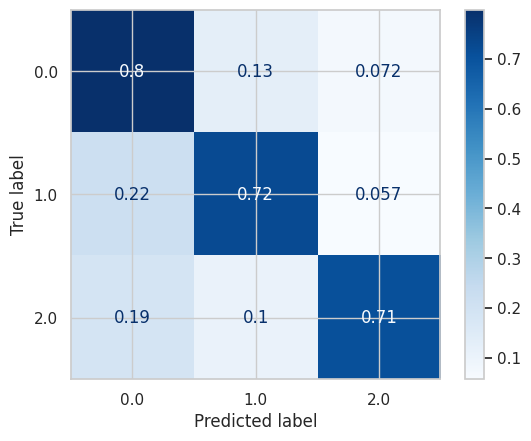

In [584]:
# Create and print confusion matrix
cnf_matrix = confusion_matrix(y_test, y_hat_test, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix, display_labels=logpipe.named_steps['classifier'].classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show();

The matrix shows how well your model is predicting the three categories: `Driver Error`, `Environmental Factors / Other`, and `Vehicle Conditions`.

**Summary of Metrics:**

- Training Precision (Weighted): **0.799**

- Testing Precision (Weighted): **0.801**

- Training Recall (Weighted): **0.760**

- Testing Recall (Weighted): **0.762**

- Training Accuracy: **0.760**

- Testing Accuracy: **0.762**

- Training F1-Score (Weighted): **0.775**

- Testing F1-Score (Weighted): **0.777**

**Interpreting the Confusion Matrix:**

The diagonal values show the proportion of correct predictions for each class. For example:

Class 0 (`Driver Error`): 80% of true class 0 were correctly predicted as class 0.

Class 1 (`Environmental Factors / Other`): 72% of true class 1 were correctly predicted as class 1.

Class 2 (`Vehicle Conditions`): 71% of true class 2 were correctly predicted as class 2.

However, there are still some misclassifications, for instance:

Class 0 (`Driver Error`) has some predictions labeled as class 1 and class 2.

Similarly, Class 2 (`Vehicle Conditions`) has misclassifications with classes 0 and 1.

The performance metrics (precision, recall, and F1 score) are all quite balanced between training and testing, suggesting that the model is not overfitting.

***
### Model 2 : Decision Trees Classifier

* Decision tree classifier is a supervised machine learning algorithm that works by splitting the data into subsets based on the value of input features.
* Each node represents a decision rule, and each branch represents an outcome of that rule.

#### Decision Trees Classifier - Iteration #1 

Base model  

#### Model Training and Prediction

In [590]:
clf_pipe = Pipeline(steps=[
    ('ss', StandardScaler()),
    ('clf', DecisionTreeClassifier(random_state=10, class_weight='balanced'))
])

# Fit the model
clf_pipe.fit(X_train_encoded, y_train)

# Make predictions for test data
y_pred = clf_pipe.predict(X_test_encoded)
y_prob = clf_pipe.predict_proba(X_test_encoded)  # Use probabilities for AUC

#### Model Evaluation

Accuracy: 0.70
AUC: 0.68
Precision (Weighted): 0.70
Recall (Weighted): 0.70
F1 Score (Weighted): 0.70

Classification Report:
              precision    recall  f1-score   support

         0.0       0.72      0.71      0.71     86897
         1.0       0.70      0.71      0.70     81336
         2.0       0.27      0.27      0.27      3014

    accuracy                           0.70    171247
   macro avg       0.56      0.56      0.56    171247
weighted avg       0.70      0.70      0.70    171247



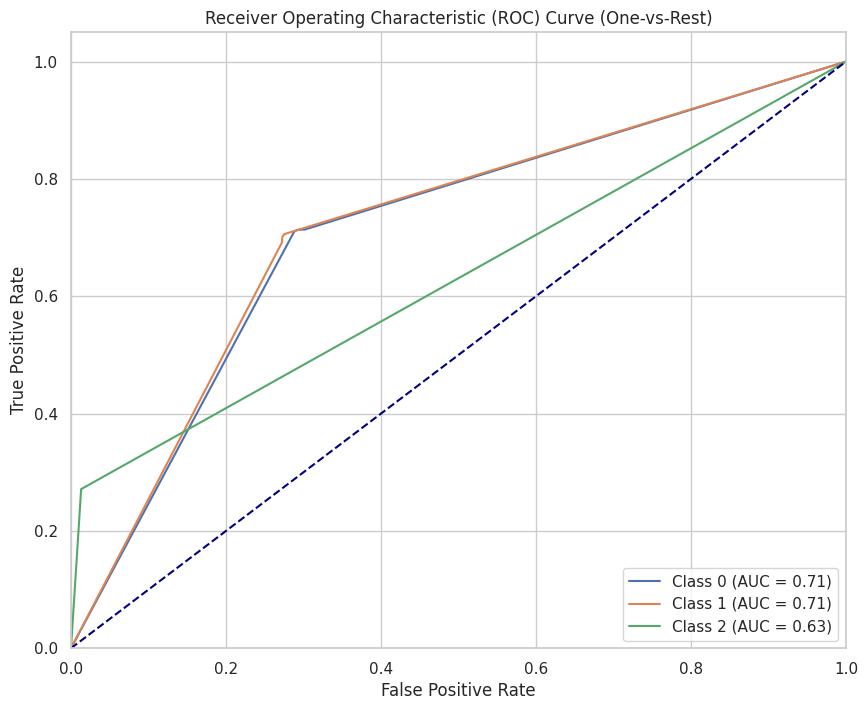

In [594]:
# Calculate accuracy
acc = accuracy_score(y_test, y_pred)
print(f'Accuracy: {acc:.2f}')

# Calculate AUC score for multiclass
roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr')  # 'ovr' is one-vs-rest, 'ovo' is one-vs-one
print(f'AUC: {roc_auc:.2f}')

# Calculate additional metrics (using 'weighted' for multiclass classification)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Precision (Weighted): {precision:.2f}')
print(f'Recall (Weighted): {recall:.2f}')
print(f'F1 Score (Weighted): {f1:.2f}')

# Print classification report for detailed metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Multiclass ROC Curve
fpr = {}
tpr = {}
roc_auc = {}
n_classes = len(clf_pipe.named_steps['clf'].classes_)

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_prob[:, i], pos_label=i)  # Use y_prob for roc_curve
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (One-vs-Rest)')
plt.legend(loc='lower right')
plt.show();

__Breakdown of the ROC curves for the three classes:__

**Class 0 - `Driver Error` (AUC = 0.71):**

The ROC curve for Class 0 is depicted in blue.
(AUC) of 0.71 indicates a moderate level of performance in distinguishing Class 0 from the other classes. This means that the model is 71% likely to correctly classify a randomly chosen positive instance of Class 0.

**Class 1 - `Environmental Factors / Other` (AUC = 0.71):**

The ROC curve for Class 1 is shown in orange.
AUC of 0.71, indicates a moderate level of performance in distinguishing Class 0 from the other classes. This means that the model is 71% likely to correctly classify a randomly chosen positive instance of Class 0 higher than a negative instance.

**Class 2 - `Vehicle Conditions` (AUC =  0.63):**

The ROC curve for Class 2 is displayed in green.
AUC is 0.63 indicates that the classifier performs worse for Class 2 compared to the other classes. An AUC of 0.63 suggests that the model has a 63% chance of correctly classifying a positive instance of Class 2

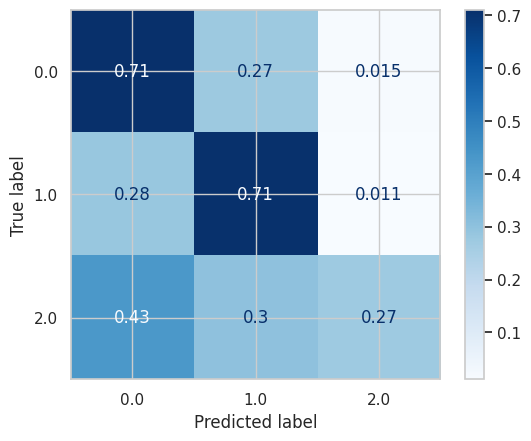

In [592]:
# Create and print confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred, normalize='true')

# Fix the confusion matrix display by accessing the classifier classes via the pipeline
disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix, display_labels=clf_pipe.named_steps['clf'].classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show();

True Label: 0 (`Driver Error`):

- Correct Predictions (0,0): 71% of instances labeled as Driver Error were correctly predicted.

- Misclassified as 1 (0,1): 27% of Driver Error instances were misclassified as Environmental Factors.

- Misclassified as 2 (0,2): 1.5% of Driver Error instances were misclassified as Vehicle Conditions.

True Label: 1 (`Environmental Factors / Other`):

- Correct Predictions (1,1): 71% of instances labeled as Environmental Factors were correctly predicted.

- Misclassified as 0 (1,0): 28% of Environmental Factors instances were misclassified as Driver Error.

- Misclassified as 2 (1,2): 1.1% were misclassified as Vehicle Conditions.

True Label: 2 (`Vehicle Conditions`):

- Correct Predictions (2,2): Only 27% of Vehicle Conditions were correctly classified.

- Misclassified as 0 (2,0): 43% of Vehicle Conditions were misclassified as Driver Error.

- Misclassified as 1 (2,1): 30% were misclassified as Environmental Factors.

**Metric Explanation:**

- Accuracy (0.70): This is the overall proportion of correct predictions out of all predictions. In this case, the model correctly predicted 70% of the test samples.

- AUC (0.68): This is the area under the ROC curve. A value of 0.68 means the model has moderate ability to distinguish between classes, though it could be improved. This score represents the one-vs-rest approach for each class.

- Precision (Weighted) (0.70): Precision focuses on how many of the predicted positive instances were correct. A weighted average of 0.70 means that across all classes, about 70% of the model's positive predictions were accurate.

- Recall (Weighted) (0.70): Recall represents how well the model identified all relevant cases. In this case, it correctly identified 70% of the actual labels across all classes.

- F1 Score (Weighted) (0.70): The F1 score is the harmonic mean of precision and recall. A weighted F1 score of 0.70 suggests the model balances precision and recall equally well.

**Key Observations:**

- Strong Performance for `Driver Error` and `Environmental Factors`: The model is good at identifying Driver Error and Environmental Factors, achieving 71% accuracy for both labels.

- Weak Performance for `Vehicle Conditions`: The model struggles with Vehicle Conditions, only classifying 27% of these correctly, with a significant portion misclassified as Driver Error (43%).

- Misclassification Patterns: There is considerable overlap between `Driver Error` and `Environmental Factors`, as well as between `Vehicle Conditions` and `Driver Error`, which might indicate that the features in your dataset are not sufficiently distinguishing between these classes.

#### Decision Trees Classifier - Iteration #2
##### Hyper-parameter tuning with gridsearchcv

*Classifier models can be optimized by tweaking the classifier's parameters. To improve the performance of the Decision Tree classifier. We've used Gridsearchcv to find the best parameters.*

In [597]:
dt_tuned = Pipeline(steps=[
    ('ss', StandardScaler()),
    ('clf', DecisionTreeClassifier(random_state=10))
])

# Define the parameter grid for DecisionTreeClassifier
param_grid = {
    'clf__criterion': ['gini', 'entropy'],
    'clf__max_depth': [2, 5, 10],
    'clf__min_samples_split': [5, 10, 20]
}

# Perform Grid Search with cross-validation
gs_tree = GridSearchCV(dt_tuned, param_grid, cv=3, scoring='accuracy')
gs_tree.fit(X_train_encoded, y_train)

# Make predictions for test data
y_pred = gs_tree.predict(X_test_encoded)

# Output the best parameters found during Grid Search
gs_tree.best_params_

{'clf__criterion': 'gini', 'clf__max_depth': 10, 'clf__min_samples_split': 20}

Accuracy: 0.80
AUC: 0.87
Precision (Weighted): 0.80
Recall (Weighted): 0.80
F1 Score (Weighted): 0.79

Classification Report:
              precision    recall  f1-score   support

         0.0       0.77      0.87      0.82     86897
         1.0       0.84      0.74      0.78     81336
         2.0       0.55      0.20      0.30      3014

    accuracy                           0.80    171247
   macro avg       0.72      0.60      0.63    171247
weighted avg       0.80      0.80      0.79    171247



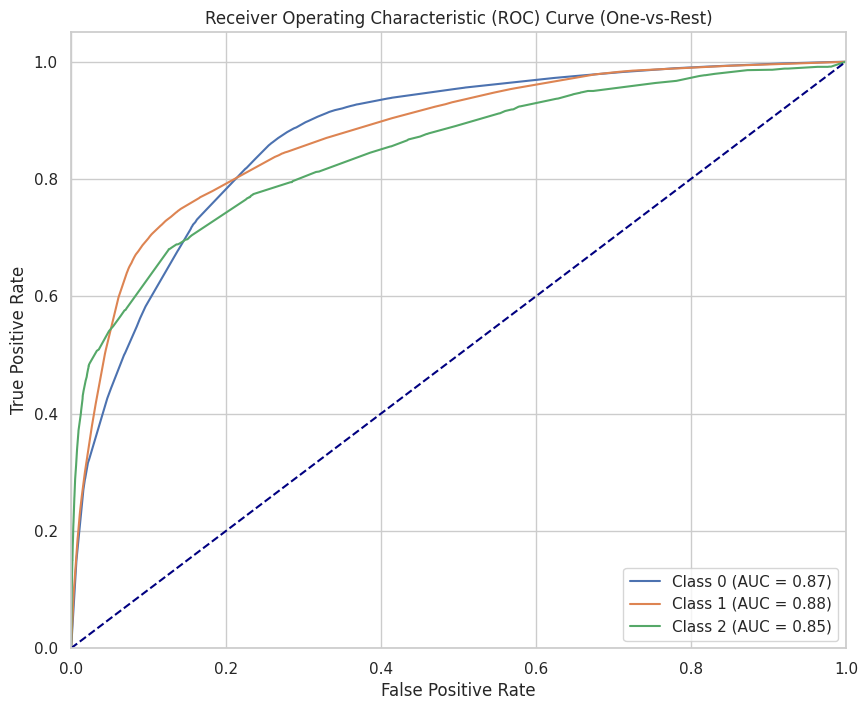

In [600]:
y_proba = gs_tree.predict_proba(X_test_encoded)  # Use probabilities for AUC

# Calculate accuracy
acc = accuracy_score(y_test, y_pred)
print(f'Accuracy: {acc:.2f}')

# Calculate AUC score for multiclass
roc_auc = roc_auc_score(y_test, y_proba, multi_class='ovr')  # 'ovr' is one-vs-rest, 'ovo' is one-vs-one
print(f'AUC: {roc_auc:.2f}')

# Calculate additional metrics (using 'weighted' for multiclass classification)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Precision (Weighted): {precision:.2f}')
print(f'Recall (Weighted): {recall:.2f}')
print(f'F1 Score (Weighted): {f1:.2f}')

# Print classification report for detailed metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Multiclass ROC Curve
fpr = {}
tpr = {}
roc_auc = {}
n_classes = len(gs_tree.best_estimator_.named_steps['clf'].classes_)

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_proba[:, i], pos_label=i)  # Use y_prob for roc_curve
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (One-vs-Rest)')
plt.legend(loc='lower right')
plt.show();

__Breakdown of the ROC curves for the three classes:__

**Class 0 - Driver Error (AUC = 0.87):**

The ROC curve for Class 0 is depicted in blue.
`(AUC) increased from 0.71 to 0.87` with hyperparameter tuning, whish indicates a good performance in distinguishing Class 0 from the other classes. This means that the model is 87% likely to rank a randomly chosen positive instance of Class 0 higher than a negative one.

**Class 1 - Environmental Factors / Other (AUC = 0.88):**

The ROC curve for Class 1 is shown in orange.
`AUC increased from 0.71 to 0.88` with hyperparameter tuning, which shows that the model performs very well in identifying Class 1. An AUC of 0.88 signifies a strong classifier for this class.

**Class 2 - Vehicle Conditions (AUC =  0.85):**

The ROC curve for Class 2 is displayed in green.
`AUC increased from is 0.63 to 0.85` indicates that the classifier is also performing well for Class 2, though slightly worse than for Class 0 and Class 1.

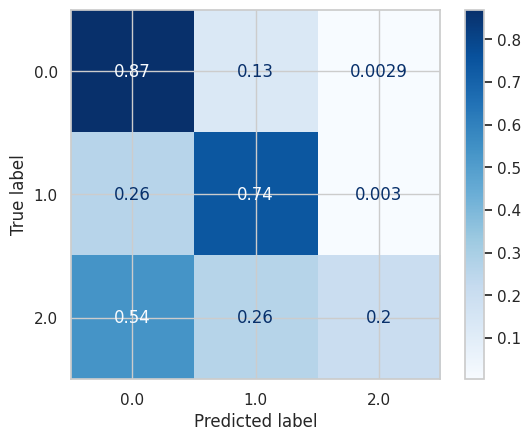

In [602]:
# Create and print confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred, normalize='true')

# Fix the confusion matrix display by accessing the classifier classes via the pipeline
disp = ConfusionMatrixDisplay(confusion_matrix=cf_matrix, display_labels=gs_tree.best_estimator_.named_steps['clf'].classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show();

The results you obtained after tuning your Decision Tree classifier with GridSearchCV show a significant improvement in model performance compared to the results before tuning. Let's break down the differences between the two evaluations:

**Performance Metrics Comparison**

Accuracy:

- Before Tuning: 0.70 (70%)  
- After Tuning: 0.80 (80%)  
Explanation: The model's ability to correctly classify instances has increased significantly after tuning, indicating better performance on the test dataset.

AUC (Area Under the ROC Curve):

- Before Tuning: 0.68
- After Tuning: 0.87
Explanation: A higher AUC value suggests that the model is better at distinguishing between classes. The substantial increase in AUC means that the tuned model has improved discrimination capability, leading to fewer false positives and false negatives.

Precision (Weighted):

- Before Tuning: 0.70
- After Tuning: 0.80
Explanation: Precision indicates the proportion of true positive predictions among all positive predictions. The increase in precision suggests that the tuned model makes fewer incorrect positive classifications.

Recall (Weighted):

- Before Tuning: 0.70
- After Tuning: 0.80
Explanation: Recall measures the proportion of actual positive cases that were correctly identified. The increase here suggests that the tuned model captures more actual positive cases, reducing false negatives.

F1 Score (Weighted):

- Before Tuning: 0.70
- After Tuning: 0.79
Explanation: The F1 Score is the harmonic mean of precision and recall. The increase indicates that the balance between precision and recall has improved, signifying a better overall model performance.

Confusion Matrix Comparison

Class 0 (Driver Error):
Increased correct classifications (0.87) and reduced misclassifications into other classes.

Class 1 (Environmental Factors / Other):
Correct predictions increased to 0.74, with fewer instances incorrectly classified into Class 0 and Class 2.

Class 2 (Vehicle Conditions):
After Tuning
True Positives (TP) for Class 2 dropped significantly, suggesting that the model misclassifies many instances of Class 2 as Class 0 or Class 1.
The number of instances classified as Class 2 by the model is low, leading to only a 2% accuracy rate.

**Summary of Improvements**

The improvements after tuning can be attributed to several factors:

Hyperparameter Optimization: GridSearchCV systematically explores combinations of hyperparameters (like criterion, max_depth, and min_samples_split), allowing the model to find more optimal settings, which can lead to significant performance gains.
Enhanced Model Complexity: By selecting a better configuration of hyperparameters, the model is better suited to the underlying data distribution, helping to avoid underfitting or overfitting.
Improved Generalization: The tuned model is likely to generalize better to unseen data, resulting in more reliable predictions across different classes.

#### Feature Importance

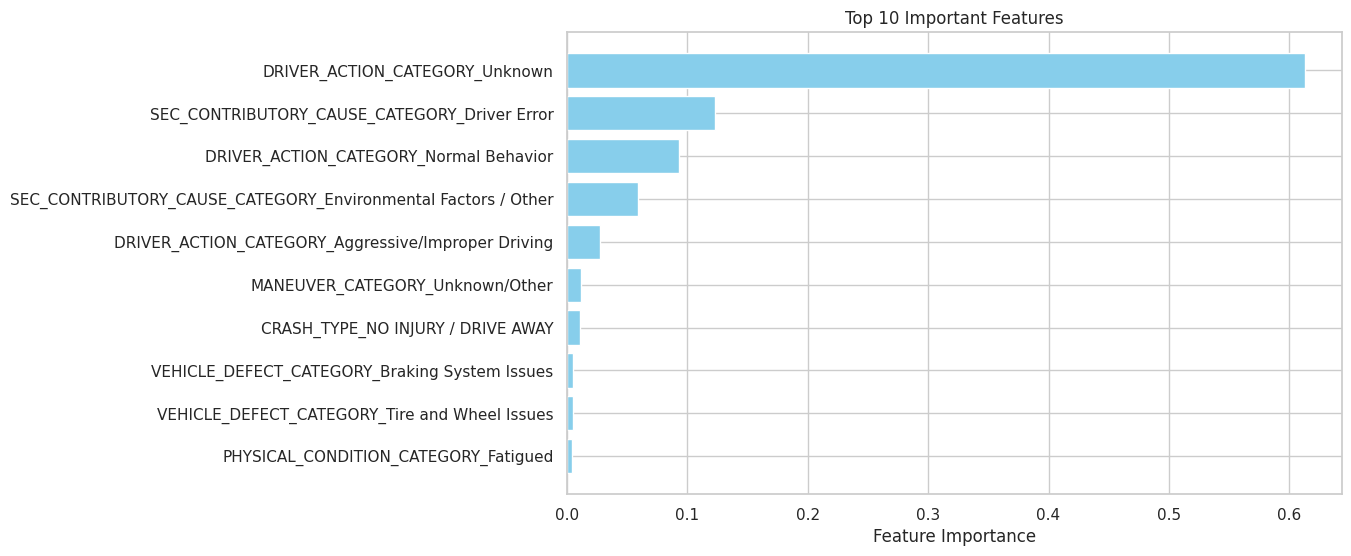

In [610]:
# Access the DecisionTreeClassifier from the pipeline
clf_model = gs_tree.best_estimator_.named_steps['clf']

# Get the feature importances
importances = rf_model.feature_importances_

# Get feature names from the encoded dataset
feature_names = X_train_encoded.columns if hasattr(X_train_encoded, 'columns') else np.arange(X_train_encoded.shape[1])

# Create a DataFrame with feature names and importances
feat_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort by importance
feat_importances = feat_importances.sort_values(by='Importance', ascending=False)

# Select top 10 features (or any number of top features you want to plot)
top_features = feat_importances.head(10)

# Plot the top features
plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Importance'], color='skyblue')
plt.gca().invert_yaxis()  # To display the most important feature at the top
plt.xlabel('Feature Importance')
plt.title('Top 10 Important Features')
plt.show()

***
### Model 3 : Random Forest Classifier
* Random forest is a supervised machine learning algorithm that creates a set of decision trees from a randomly selected subset of the training data.
* Random forest is best suited for handling large, complex datasets and providing insight into feature importance.

In [611]:
# Create the pipeline
rf_pipe0 = Pipeline(steps=[
    ('ss', StandardScaler()),
    ('rf', RandomForestClassifier(n_estimators=50,
                                  class_weight='balanced',
                                  random_state=42))
])

# Define the parameter grid for RandomForestClassifier
param_grid = {
    'rf__max_depth': [2, 5, 10],
    'rf__min_samples_split': [5, 10, 20]
}

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(rf_pipe0, param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train_encoded, y_train)

# Make predictions for test data
y_pred = grid_search.predict(X_test_encoded)

# Output the best parameters found during Grid Search
print("Best parameters:", grid_search.best_params_)

Best parameters: {'rf__max_depth': 10, 'rf__min_samples_split': 5}


In [612]:
# Evaluation of Model
y_h_test = grid_search.predict(X_test_encoded)

# Use 'weighted' average for multiclass classification metrics
print('Testing Precision (Weighted): ', precision_score(y_test, y_hat_test, average='weighted'))
print('\n\n')

print('Testing Recall (Weighted): ', recall_score(y_test, y_hat_test, average='weighted'))
print('\n\n')

print('Testing Accuracy: ', accuracy_score(y_test, y_hat_test))
print('\n\n')

print('Testing F1-Score (Weighted): ', f1_score(y_test, y_hat_test, average='weighted'))

Testing Precision (Weighted):  0.801289323255472



Testing Recall (Weighted):  0.7618118857556628



Testing Accuracy:  0.7618118857556628



Testing F1-Score (Weighted):  0.7766173156557351


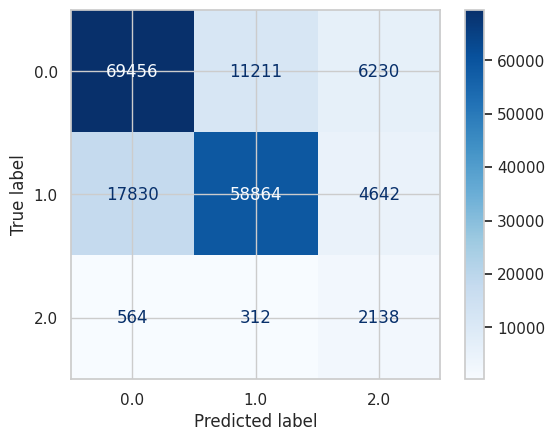

In [614]:
# Create and print confusion matrix
rf_matrix = confusion_matrix(y_test, y_hat_test)

# Get the unique class labels from y_test
class_labels = np.unique(y_test)

# Create confusion matrix display
disp = ConfusionMatrixDisplay(confusion_matrix=rf_matrix, display_labels=class_labels)

# Plot the confusion matrix
disp.plot(cmap=plt.cm.Blues)
plt.show()

#### Confusion Matrix Analysis

**Class 0.0:**

        True Positives (Correctly Predicted as 0.0): 69,456
        False Positives (Predicted as 0.0 but True Label was 1.0 or 2.0): Not directly shown but can be inferred.
        False Negatives (True Label is 0.0 but Predicted as 1.0 or 2.0): 11,211 + 6,230 = 17,441
**Class 1.0:**

       True Positives: 58,864
       False Negatives: 17,830 (True Label is 1.0 but Predicted as 0.0) + 4,642 (Predicted as 2.0) = 22,472            
       False `Positives: 11,211 (Predicted as 1.0 but True Label was 0.0) + 312 (True Label was 2.0) = 11,523
        
**Class 2.0:**

        True Positives: 2,138
        False Negatives: 564 + 312 = 876
        False Positives: 6,230 (True Label was 0.0) + 4,642 (True Label was 1.0) = 10,872
        
**Accuracy:**

`76.18%:` Overall, the model correctly classified about 76% of all test samples. This reflects how often the model is correct.

**Precision (Weighted):**

`80.13%:` Precision measures the accuracy of the positive predictions. The weighted average here takes into account the distribution of samples across classes. The model has a relatively high precision, meaning it is effective at avoiding false positives across all classes.

**Recall (Weighted):**

`76.18%:` Recall measures how well the model captures the true instances of each class. A recall of 76% means that the model correctly identifies 76% of the actual samples for each class (weighted average). However, it may still miss some, as shown by the false negatives.

**F1-Score (Weighted):**
`77.66%:` The F1-score balances precision and recall, providing a single metric to understand the trade-off. It indicates that the model performs well in both correctly identifying instances and minimizing false positives.
  
  
#### Feature Importance

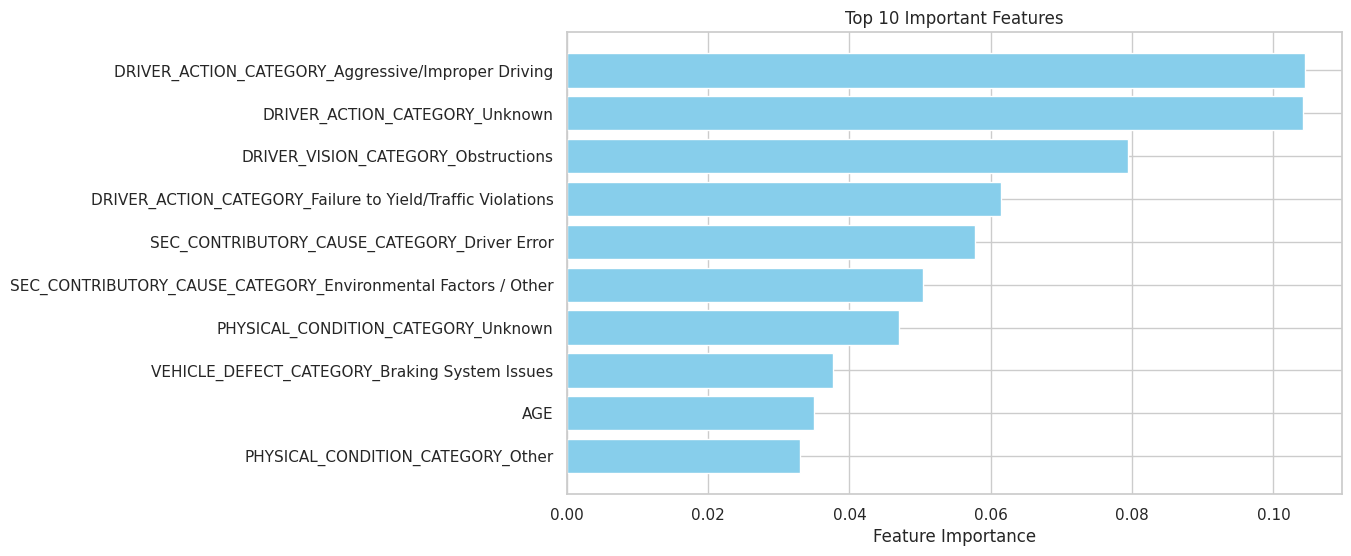

In [615]:
# Access the RandomForestClassifier from the pipeline
rf_model = grid_search.best_estimator_.named_steps['rf']

# Get the feature importances
importances = rf_model.feature_importances_

# Get feature names from the encoded dataset
feature_names = X_train_encoded.columns if hasattr(X_train_encoded, 'columns') else np.arange(X_train_encoded.shape[1])

# Create a DataFrame with feature names and importances
feat_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort by importance
feat_importances = feat_importances.sort_values(by='Importance', ascending=False)

# Select top 10 features (or any number of top features you want to plot)
top_features = feat_importances.head(10)

# Plot the top features
plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Importance'], color='skyblue')
plt.gca().invert_yaxis()  # To display the most important feature at the top
plt.xlabel('Feature Importance')
plt.title('Top 10 Important Features')
plt.show()

***
# Black Box Modeling

### Model 4 : XGBoost
* XGBoost is a stand-alone library that implements popular gradient boosting algorithms in the fastest, most performant way possible.  
* There are many under-the-hood optimizations that allow XGBoost to train more quickly than any other library implementations of gradient boosting algorithms.


In [616]:
# XGBoost pipeline with best parameters
xgpipe = Pipeline(steps=[
    ('ss', StandardScaler()),
    ('classifier', XGBClassifier(max_depth=4, 
                                 eta=0.1, 
                                 scale_pos_weight=700, 
                                 tree_method='hist'))
])

# Fit the model
xgpipe.fit(X_train_encoded, y_train)

# Evaluation of the model
y_hat_train = xgpipe.predict(X_train_encoded)
y_hat_test = xgpipe.predict(X_test_encoded)

Training Precision (Weighted):  0.7987924228408922
Testing Precision (Weighted):  0.8011340541333205



Training Recall (Weighted):  0.7962825626142356
Testing Recall (Weighted):  0.7987935555075417



Training Accuracy:  0.7962825626142356
Testing Accuracy:  0.7987935555075417



Training F1-Score (Weighted):  0.7929089505857183
Testing F1-Score (Weighted):  0.7953181338272686


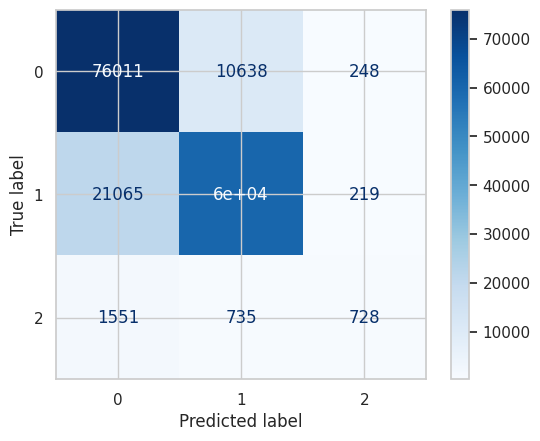

In [617]:
# Use 'weighted' average for multiclass classification metrics
print('Training Precision (Weighted): ', precision_score(y_train, y_hat_train, average='weighted'))
print('Testing Precision (Weighted): ', precision_score(y_test, y_hat_test, average='weighted'))
print('\n\n')

print('Training Recall (Weighted): ', recall_score(y_train, y_hat_train, average='weighted'))
print('Testing Recall (Weighted): ', recall_score(y_test, y_hat_test, average='weighted'))
print('\n\n')

print('Training Accuracy: ', accuracy_score(y_train, y_hat_train))
print('Testing Accuracy: ', accuracy_score(y_test, y_hat_test))
print('\n\n')

print('Training F1-Score (Weighted): ', f1_score(y_train, y_hat_train, average='weighted'))
print('Testing F1-Score (Weighted): ', f1_score(y_test, y_hat_test, average='weighted'))

# Create and print confusion matrix
xg_matrix = confusion_matrix(y_test, y_hat_test)
disp = ConfusionMatrixDisplay(confusion_matrix=xg_matrix, display_labels=xgpipe.named_steps['classifier'].classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show();

**Class 0:**

`True Positives:` 76,011 (correctly predicted as class 0)
`False Negatives:` 2,1065 (incorrectly predicted as class 1)
`False Positives:` 10,638 (incorrectly predicted as class 0)

**Class 1:**
`True Positives:` 60,000 (correctly predicted as class 1)
`False Negatives:` 1,551 (incorrectly predicted as class 2)
`False Positives:` 735 (incorrectly predicted as class 1)

**Class 2:**
`True Positives:` 728 (correctly predicted as class 2)
`False Negatives:` 248 (incorrectly predicted as class 0)
`False Positives:` 1,551 (incorrectly predicted as class 2)

**Precision:** 

`Training Precision: 0.7988 - 79.88%` of the positive predictions made on the training data were correct.
`Testing Precision: 0.8011 - 80.11%` of the positive predictions made on the testing data were correct.

**Recall:** 

`Training Recall:` 0.7963 - 79.63% of the actual positive cases in the training data were correctly identified.
`Testing Recall:` 0.7988 - 79.88% of the actual positive cases in the testing data were correctly identified.

**Accuracy:** 

`Training Accuracy:` 0.7963 - 79.63% of all predictions made on the training data were correct.
`Testing Accuracy:` 0.7988 - 79.88% of all predictions made on the testing data were correct.

**F1-Score:** 

`Training F1-Score:` 0.7929 - 79.29% is the balanced score considering precision and recall for the training data.
`Testing F1-Score:` 0.7953 - 79.53% is the balanced score considering precision and recall for the testing data.

#### Feature Importance

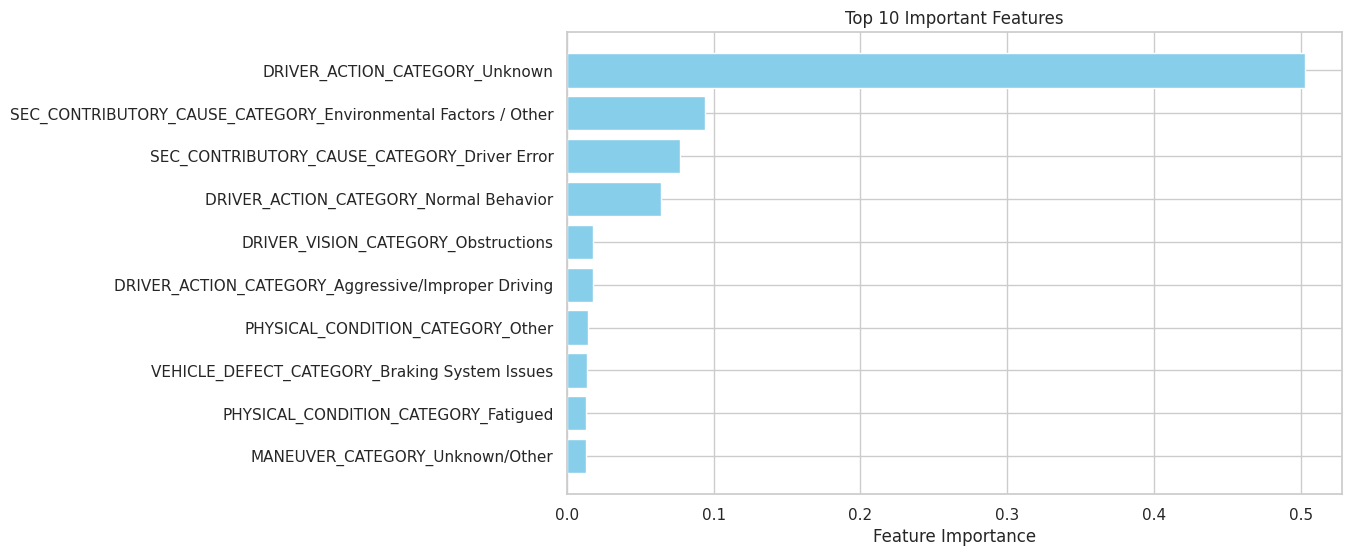

In [620]:
# Access the XGBoost model from the pipeline
xg_model = xgpipe.named_steps['classifier'] 

# Get the feature importances from the XGBoost model
importances = xg_model.feature_importances_

# Get feature names from the encoded dataset
feature_names = X_train_encoded.columns if hasattr(X_train_encoded, 'columns') else np.arange(X_train_encoded.shape[1])

# Create a DataFrame with feature names and their importances
feat_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort by importance
feat_importances = feat_importances.sort_values(by='Importance', ascending=False)

# Select top 10 features (or any number of top features you want to plot)
top_features = feat_importances.head(10)

# Plot the top features
plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Importance'], color='skyblue')
plt.gca().invert_yaxis()  # To display the most important feature at the top
plt.xlabel('Feature Importance')
plt.title('Top 10 Important Features')
plt.show();